In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # 데이터 분할

In [14]:
cust_df  = pd.read_csv('./train.csv')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [15]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [19]:
cond1 = cust_df['var3']==-999999
cond1.sum()

# -999999의 값을 2로 변환해보자.
cust_df['var3'].replace(-999999,2, inplace=True)

# ID 컬럼값을 drop해보자.
cust_df.drop('ID', axis=1, inplace=True)

In [20]:
# 데이터의 분포를 확인하여 TARGET값을 확인- value_counts()
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [29]:
cust_df_un=cust_df[cust_df['TARGET']==1].TARGET.count()
#또는 cust_df[cust_df['TARGET']==1].shape[0]

total_df=cust_df['TARGET'].count()
#total_df=cust_df.shape[0]

print('불만족 비율은:', np.round(cust_df_un/total_df,5))

불만족 비율은: 0.03957


In [36]:
santa_y = cust_df.iloc[:,-1]
santa_X = cust_df.iloc[:,:-1]

In [108]:
# 데이터분할_split_data

X_train, X_val, y_train, y_val = train_test_split(santa_X, santa_y, test_size=0.2, random_state=0)

train_cnt = y_train.count()
val_cnt = y_val.count()

print('학습 데이터 shape:{0}, 검증 데이터 shape:{1}'.format(X_train.shape, X_val.shape))
print(y_train.value_counts()/train_cnt)
print(y_val.value_counts()/val_cnt)

학습 데이터 shape:(60816, 369), 검증 데이터 shape:(15204, 369)
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [109]:
# 사이킷런 래퍼 사용 XGBClassifier
# n_estimators = 200
# early_stopping_rounds = 50
# kaggle data에서의 평가지표가 auc :: 따라서 eval_metric을 'auc'로 설정할 계획

In [110]:
!pip install xgboost

     ------------------------------------- 106.6/106.6 MB 18.7 MB/s eta 0:00:00


In [111]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score

In [115]:
# n_estimator는 5000으로, random_state는 여러분들의 결과 동일화를 위해 시행
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)


# 성능 평가 지표를 auc로, 조기 중단(early_stopping)파라미터는 100으로 설정
# 학습수행.

xgb_clf.fit(X_train,y_train, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_train,y_train), (X_val,y_val)]) 

# eval_metric :: rmse, mae, logloss, error(Binary Classification error rate :: 0.5가 threshold)
# eval_metric :: multi-class관련 merror, mlogloss
# eval_metric :: auc


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1]:
# LightGBM쓰면 끝납니다....
# Xgboost면 끝남....
# rf, dt, lr_clf 적용 

from xgboost import XGBClassifier # XGBoost 사용법
from lightgbm import LGBMClassifier # LightGBM 사용법


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [10]:
santa_X = cust_df.iloc[:,:-1]
santa_y = cust_df.iloc[:,-1]

In [11]:
# train_test_split시에 조심해서 할 것~!

X_train, X_test, y_train, y_test = train_test_split(santa_X, santa_y, test_size = .2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 데이터 shape:{0}, 테스트 데이터 shape:{1}'.format(X_train.shape,X_test.shape))
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

학습 데이터 shape:(60816, 370), 테스트 데이터 shape:(15204, 370)
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimator는 500으로, random_state는 예제 수행시 동일한 결과를 위해 시행
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.

xgb_clf.fit(X_train,y_train, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82005	validation_1-auc:0.81154
[1]	validation_0-auc:0.83358	validation_1-auc:0.82417
[2]	validation_0-auc:0.83801	validation_1-auc:0.82643
[3]	validation_0-auc:0.84532	validation_1-auc:0.82851
[4]	validation_0-auc:0.84796	validation_1-auc:0.83293
[5]	validation_0-auc:0.85237	validation_1-auc:0.83518
[6]	validation_0-auc:0.85659	validation_1-auc:0.83517
[7]	validation_0-auc:0.85978	validation_1-auc:0.83745
[8]	validation_0-auc:0.86288	validation_1-auc:0.83821
[9]	validation_0-auc:0.86660	validation_1-auc:0.83791
[10]	validation_0-auc:0.87000	validation_1-auc:0.83862
[11]	validation_0-auc:0.87372	validation_1-auc:0.83882
[12]	validation_0-auc:0.87556	validation_1-auc:0.83883
[13]	validation_0-auc:0.87892	validation_1-auc:0.83946
[14]	validation_0-auc:0.88170	validation_1-auc:0.83915
[15]	validation_0-auc:0.88450	validation_1-auc:0.83904
[16]	validation_0-auc:0.88615	validation_1-auc:0.83847
[17]	validation_0-auc:0.88817	validation_1-auc:0.83792
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
# sklearn에서의 지표와 비교를 하여 분석
xgb_roc_auc = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
print('ROC_AUC:{0:0.4f}'.format(xgb_roc_auc))

ROC_AUC:0.8413


In [121]:
# 층화 데이터 분할을 수행하지 않았음!
# 다른 알고리즘과의 비교
# rf_clf, dt_clf, AdaBoosting_clf
# lr_clf

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 알고리즘 선언
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# for문을 통한 학습 수행
clfs =[rf_clf, ada_clf, dt_clf, lr_clf, knn_clf]

for clf in clfs:
    clf.fit(X_train,y_train)
    pred = clf.predict(X_val)
    clf_name = clf.__class__.__name__
    print('{0} roc_auc_score:{1:.4f}'.format(clf_name, roc_auc_score(y_val,pred)))

RandomForestClassifier roc_auc_score:0.5218
AdaBoostClassifier roc_auc_score:0.5006
DecisionTreeClassifier roc_auc_score:0.5473


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression roc_auc_score:0.5000
KNeighborsClassifier roc_auc_score:0.5018


In [123]:
# 층화 데이터 분할을 수행할 계획~!
# train_test_split시에 조심해서 할 것~!

X_train, X_test, y_train, y_test = train_test_split(santa_X, santa_y, test_size = .2, random_state=0,
                                                   stratify=santa_y)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 데이터 shape:{0}, 테스트 데이터 shape:{1}'.format(X_train.shape,X_test.shape))
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

학습 데이터 shape:(60816, 369), 테스트 데이터 shape:(15204, 369)
0    0.960438
1    0.039562
Name: TARGET, dtype: float64
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [131]:
# 층화 데이터 분할을 수행했음!
# 다른 알고리즘과의 비교
# rf_clf, dt_clf, AdaBoosting_clf
# lr_clf

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 알고리즘 선언
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# for문을 통한 학습 수행
clfs =[rf_clf, ada_clf, dt_clf, lr_clf, knn_clf]

for clf in clfs:
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    clf_name = clf.__class__.__name__
    print('{0} roc_auc_score:{1:.4f}'.format(clf_name, roc_auc_score(y_test,pred)))

RandomForestClassifier roc_auc_score:0.5190
AdaBoostClassifier roc_auc_score:0.5031
DecisionTreeClassifier roc_auc_score:0.5534


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression roc_auc_score:0.5000
KNeighborsClassifier roc_auc_score:0.4995


In [125]:
# 층화 데이터 분할을 수행했음!
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimator는 500으로, random_state는 예제 수행시 동일한 결과를 위해 시행
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.

xgb_clf.fit(X_train,y_train, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)])

# sklearn에서의 지표와 비교를 하여 분석
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC_AUC:{0:0.4f}'.format(xgb_roc_auc))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88675	validation_1-auc:0.82453
[18]	validation_0-au

In [132]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 테스트 수행속도 향상을 위해 n_estimator를 100으로 감소..
xgb_clf_gcv =XGBClassifier(n_estimators=100)

params = {'max_depth':[5,6,7],
         'min_child_weight':[1,2,3]}

## 하이퍼 파라미터의 테스트 수행속도 증가를 위해 CV는 지정하지 않음.
grid_xgb = GridSearchCV(xgb_clf_gcv,param_grid=params)
grid_xgb.fit(X_train,y_train, early_stopping_rounds=35, eval_metric='auc',
            eval_set=[(X_train,y_train),(X_test,y_test)])

print('gridsearch_CV의 최적 파라미터:', grid_xgb.best_params_)

xgb_roc_score = roc_auc_score(y_test, grid_xgb.predict_proba(X_test)[:,1])
print('튜닝된 ROC_AUC:{0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81903	validation_1-auc:0.78986
[1]	validation_0-auc:0.83060	validation_1-auc:0.80026
[2]	validation_0-auc:0.83364	validation_1-auc:0.80191
[3]	validation_0-auc:0.83688	validation_1-auc:0.80614
[4]	validation_0-auc:0.83847	validation_1-auc:0.80605
[5]	validation_0-auc:0.84211	validation_1-auc:0.80987
[6]	validation_0-auc:0.84729	validation_1-auc:0.81440
[7]	validation_0-auc:0.85007	validation_1-auc:0.81757
[8]	validation_0-auc:0.85232	validation_1-auc:0.81877
[9]	validation_0-auc:0.85400	validation_1-auc:0.82055
[10]	validation_0-auc:0.85678	validation_1-auc:0.82070
[11]	validation_0-auc:0.85885	validation_1-auc:0.82186
[12]	validation_0-auc:0.86024	validation_1-auc:0.82421
[13]	validation_0-auc:0.86227	validation_1-auc:0.82463
[14]	validation_0-auc:0.86425	validation_1-auc:0.82390
[15]	validation_0-auc:0.86540	validation_1-auc:0.82509
[16]	validation_0-auc:0.86707	validation_1-auc:0.82449
[17]	validation_0-auc:0.86849	validation_1-auc:0.82373
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81988	validation_1-auc:0.78612
[1]	validation_0-auc:0.83156	validation_1-auc:0.79881
[2]	validation_0-auc:0.83362	validation_1-auc:0.80060
[3]	validation_0-auc:0.83609	validation_1-auc:0.80284
[4]	validation_0-auc:0.83848	validation_1-auc:0.80445
[5]	validation_0-auc:0.84615	validation_1-auc:0.81347
[6]	validation_0-auc:0.84890	validation_1-auc:0.81544
[7]	validation_0-auc:0.85132	validation_1-auc:0.81663
[8]	validation_0-auc:0.85453	validation_1-auc:0.81776
[9]	validation_0-auc:0.85618	validation_1-auc:0.81842
[10]	validation_0-auc:0.85868	validation_1-auc:0.81854
[11]	validation_0-auc:0.85927	validation_1-auc:0.81730
[12]	validation_0-auc:0.86126	validation_1-auc:0.81887
[13]	validation_0-auc:0.86225	validation_1-auc:0.81903
[14]	validation_0-auc:0.86441	validation_1-auc:0.81992
[15]	validation_0-auc:0.86551	validation_1-auc:0.82087
[16]	validation_0-auc:0.86718	validation_1-auc:0.82094
[17]	validation_0-auc:0.86870	validation_1-auc:0.82159
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81862	validation_1-auc:0.78846
[1]	validation_0-auc:0.83003	validation_1-auc:0.80107
[2]	validation_0-auc:0.83420	validation_1-auc:0.80379
[3]	validation_0-auc:0.83749	validation_1-auc:0.80551
[4]	validation_0-auc:0.84053	validation_1-auc:0.80692
[5]	validation_0-auc:0.84475	validation_1-auc:0.81309
[6]	validation_0-auc:0.84959	validation_1-auc:0.81625
[7]	validation_0-auc:0.85171	validation_1-auc:0.81736
[8]	validation_0-auc:0.85362	validation_1-auc:0.81906
[9]	validation_0-auc:0.85477	validation_1-auc:0.81912
[10]	validation_0-auc:0.85652	validation_1-auc:0.81893
[11]	validation_0-auc:0.85928	validation_1-auc:0.82070
[12]	validation_0-auc:0.86208	validation_1-auc:0.82220
[13]	validation_0-auc:0.86437	validation_1-auc:0.82370
[14]	validation_0-auc:0.86555	validation_1-auc:0.82399
[15]	validation_0-auc:0.86777	validation_1-auc:0.82417
[16]	validation_0-auc:0.86908	validation_1-auc:0.82487
[17]	validation_0-auc:0.87048	validation_1-auc:0.82529
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82146	validation_1-auc:0.79236
[1]	validation_0-auc:0.83205	validation_1-auc:0.80294
[2]	validation_0-auc:0.83484	validation_1-auc:0.80411
[3]	validation_0-auc:0.83808	validation_1-auc:0.80961
[4]	validation_0-auc:0.83987	validation_1-auc:0.81027
[5]	validation_0-auc:0.84156	validation_1-auc:0.81232
[6]	validation_0-auc:0.84723	validation_1-auc:0.81571
[7]	validation_0-auc:0.84945	validation_1-auc:0.81703
[8]	validation_0-auc:0.85210	validation_1-auc:0.81987
[9]	validation_0-auc:0.85522	validation_1-auc:0.82185
[10]	validation_0-auc:0.85698	validation_1-auc:0.82381
[11]	validation_0-auc:0.85846	validation_1-auc:0.82359
[12]	validation_0-auc:0.86012	validation_1-auc:0.82324
[13]	validation_0-auc:0.86124	validation_1-auc:0.82376
[14]	validation_0-auc:0.86416	validation_1-auc:0.82245
[15]	validation_0-auc:0.86561	validation_1-auc:0.82350
[16]	validation_0-auc:0.86697	validation_1-auc:0.82400
[17]	validation_0-auc:0.86892	validation_1-auc:0.82496
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81735	validation_1-auc:0.78825
[1]	validation_0-auc:0.83113	validation_1-auc:0.80079
[2]	validation_0-auc:0.83751	validation_1-auc:0.80777
[3]	validation_0-auc:0.83804	validation_1-auc:0.80860
[4]	validation_0-auc:0.84255	validation_1-auc:0.81367
[5]	validation_0-auc:0.84386	validation_1-auc:0.81402
[6]	validation_0-auc:0.84814	validation_1-auc:0.81564
[7]	validation_0-auc:0.85148	validation_1-auc:0.81887
[8]	validation_0-auc:0.85334	validation_1-auc:0.81973
[9]	validation_0-auc:0.85483	validation_1-auc:0.82086
[10]	validation_0-auc:0.85713	validation_1-auc:0.82330
[11]	validation_0-auc:0.85897	validation_1-auc:0.82247
[12]	validation_0-auc:0.86135	validation_1-auc:0.82267
[13]	validation_0-auc:0.86370	validation_1-auc:0.82210
[14]	validation_0-auc:0.86513	validation_1-auc:0.82276
[15]	validation_0-auc:0.86643	validation_1-auc:0.82299
[16]	validation_0-auc:0.86788	validation_1-auc:0.82411
[17]	validation_0-auc:0.86931	validation_1-auc:0.82393
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81873	validation_1-auc:0.79124
[1]	validation_0-auc:0.83066	validation_1-auc:0.80175
[2]	validation_0-auc:0.83442	validation_1-auc:0.80454
[3]	validation_0-auc:0.83710	validation_1-auc:0.80699
[4]	validation_0-auc:0.84180	validation_1-auc:0.81149
[5]	validation_0-auc:0.84379	validation_1-auc:0.81425
[6]	validation_0-auc:0.84748	validation_1-auc:0.81384
[7]	validation_0-auc:0.85014	validation_1-auc:0.81583
[8]	validation_0-auc:0.85201	validation_1-auc:0.81784
[9]	validation_0-auc:0.85377	validation_1-auc:0.82018
[10]	validation_0-auc:0.85589	validation_1-auc:0.82084
[11]	validation_0-auc:0.85814	validation_1-auc:0.82261
[12]	validation_0-auc:0.86015	validation_1-auc:0.82262
[13]	validation_0-auc:0.86191	validation_1-auc:0.82385
[14]	validation_0-auc:0.86311	validation_1-auc:0.82470
[15]	validation_0-auc:0.86485	validation_1-auc:0.82600
[16]	validation_0-auc:0.86569	validation_1-auc:0.82636
[17]	validation_0-auc:0.86712	validation_1-auc:0.82563
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81967	validation_1-auc:0.78684
[1]	validation_0-auc:0.83020	validation_1-auc:0.79819
[2]	validation_0-auc:0.83373	validation_1-auc:0.80142
[3]	validation_0-auc:0.83711	validation_1-auc:0.80454
[4]	validation_0-auc:0.84021	validation_1-auc:0.80779
[5]	validation_0-auc:0.84183	validation_1-auc:0.80853
[6]	validation_0-auc:0.84501	validation_1-auc:0.81263
[7]	validation_0-auc:0.84971	validation_1-auc:0.81772
[8]	validation_0-auc:0.85238	validation_1-auc:0.81905
[9]	validation_0-auc:0.85439	validation_1-auc:0.81989
[10]	validation_0-auc:0.85610	validation_1-auc:0.81999
[11]	validation_0-auc:0.85744	validation_1-auc:0.82102
[12]	validation_0-auc:0.85928	validation_1-auc:0.82207
[13]	validation_0-auc:0.86044	validation_1-auc:0.82303
[14]	validation_0-auc:0.86183	validation_1-auc:0.82403
[15]	validation_0-auc:0.86418	validation_1-auc:0.82434
[16]	validation_0-auc:0.86548	validation_1-auc:0.82492
[17]	validation_0-auc:0.86721	validation_1-auc:0.82405
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81818	validation_1-auc:0.78798
[1]	validation_0-auc:0.82989	validation_1-auc:0.80036
[2]	validation_0-auc:0.83471	validation_1-auc:0.80290
[3]	validation_0-auc:0.83847	validation_1-auc:0.80514
[4]	validation_0-auc:0.84275	validation_1-auc:0.81054
[5]	validation_0-auc:0.84539	validation_1-auc:0.81500
[6]	validation_0-auc:0.84892	validation_1-auc:0.81715
[7]	validation_0-auc:0.85212	validation_1-auc:0.81780
[8]	validation_0-auc:0.85401	validation_1-auc:0.81920
[9]	validation_0-auc:0.85595	validation_1-auc:0.81992
[10]	validation_0-auc:0.85792	validation_1-auc:0.82187
[11]	validation_0-auc:0.86025	validation_1-auc:0.82220
[12]	validation_0-auc:0.86155	validation_1-auc:0.82305
[13]	validation_0-auc:0.86260	validation_1-auc:0.82238
[14]	validation_0-auc:0.86406	validation_1-auc:0.82247
[15]	validation_0-auc:0.86514	validation_1-auc:0.82267
[16]	validation_0-auc:0.86624	validation_1-auc:0.82316
[17]	validation_0-auc:0.86743	validation_1-auc:0.82277
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82180	validation_1-auc:0.79490
[1]	validation_0-auc:0.83272	validation_1-auc:0.80392
[2]	validation_0-auc:0.83484	validation_1-auc:0.80444
[3]	validation_0-auc:0.83850	validation_1-auc:0.80950
[4]	validation_0-auc:0.84028	validation_1-auc:0.81018
[5]	validation_0-auc:0.84424	validation_1-auc:0.81210
[6]	validation_0-auc:0.84790	validation_1-auc:0.81694
[7]	validation_0-auc:0.85007	validation_1-auc:0.81842
[8]	validation_0-auc:0.85293	validation_1-auc:0.81934
[9]	validation_0-auc:0.85450	validation_1-auc:0.82243
[10]	validation_0-auc:0.85732	validation_1-auc:0.82356
[11]	validation_0-auc:0.85939	validation_1-auc:0.82463
[12]	validation_0-auc:0.86118	validation_1-auc:0.82418
[13]	validation_0-auc:0.86280	validation_1-auc:0.82523
[14]	validation_0-auc:0.86467	validation_1-auc:0.82513
[15]	validation_0-auc:0.86583	validation_1-auc:0.82520
[16]	validation_0-auc:0.86765	validation_1-auc:0.82536
[17]	validation_0-auc:0.86885	validation_1-auc:0.82487
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81986	validation_1-auc:0.79420
[1]	validation_0-auc:0.83457	validation_1-auc:0.80949
[2]	validation_0-auc:0.83835	validation_1-auc:0.81233
[3]	validation_0-auc:0.84084	validation_1-auc:0.81415
[4]	validation_0-auc:0.84238	validation_1-auc:0.81439
[5]	validation_0-auc:0.84288	validation_1-auc:0.81515
[6]	validation_0-auc:0.84738	validation_1-auc:0.81703
[7]	validation_0-auc:0.85115	validation_1-auc:0.81857
[8]	validation_0-auc:0.85310	validation_1-auc:0.81952
[9]	validation_0-auc:0.85426	validation_1-auc:0.82106
[10]	validation_0-auc:0.85624	validation_1-auc:0.82228
[11]	validation_0-auc:0.85830	validation_1-auc:0.82128
[12]	validation_0-auc:0.86023	validation_1-auc:0.82127
[13]	validation_0-auc:0.86213	validation_1-auc:0.82087
[14]	validation_0-auc:0.86334	validation_1-auc:0.82083
[15]	validation_0-auc:0.86506	validation_1-auc:0.82155
[16]	validation_0-auc:0.86588	validation_1-auc:0.82250
[17]	validation_0-auc:0.86706	validation_1-auc:0.82166
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81825	validation_1-auc:0.79102
[1]	validation_0-auc:0.83113	validation_1-auc:0.80451
[2]	validation_0-auc:0.83443	validation_1-auc:0.80575
[3]	validation_0-auc:0.83664	validation_1-auc:0.80436
[4]	validation_0-auc:0.84266	validation_1-auc:0.81320
[5]	validation_0-auc:0.84441	validation_1-auc:0.81417
[6]	validation_0-auc:0.84743	validation_1-auc:0.81579
[7]	validation_0-auc:0.84982	validation_1-auc:0.81763
[8]	validation_0-auc:0.85287	validation_1-auc:0.82026
[9]	validation_0-auc:0.85506	validation_1-auc:0.82103
[10]	validation_0-auc:0.85674	validation_1-auc:0.82222
[11]	validation_0-auc:0.85917	validation_1-auc:0.82303
[12]	validation_0-auc:0.86061	validation_1-auc:0.82282
[13]	validation_0-auc:0.86212	validation_1-auc:0.82296
[14]	validation_0-auc:0.86322	validation_1-auc:0.82256
[15]	validation_0-auc:0.86482	validation_1-auc:0.82307
[16]	validation_0-auc:0.86586	validation_1-auc:0.82247
[17]	validation_0-auc:0.86742	validation_1-auc:0.82302
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81904	validation_1-auc:0.78758
[1]	validation_0-auc:0.83098	validation_1-auc:0.79848
[2]	validation_0-auc:0.83347	validation_1-auc:0.80239
[3]	validation_0-auc:0.83819	validation_1-auc:0.80682
[4]	validation_0-auc:0.83981	validation_1-auc:0.80771
[5]	validation_0-auc:0.84691	validation_1-auc:0.81620
[6]	validation_0-auc:0.84980	validation_1-auc:0.81745
[7]	validation_0-auc:0.85111	validation_1-auc:0.81856
[8]	validation_0-auc:0.85316	validation_1-auc:0.81853
[9]	validation_0-auc:0.85547	validation_1-auc:0.81943
[10]	validation_0-auc:0.85740	validation_1-auc:0.82032
[11]	validation_0-auc:0.85886	validation_1-auc:0.82086
[12]	validation_0-auc:0.86005	validation_1-auc:0.82081
[13]	validation_0-auc:0.86177	validation_1-auc:0.82081
[14]	validation_0-auc:0.86329	validation_1-auc:0.82083
[15]	validation_0-auc:0.86494	validation_1-auc:0.82102
[16]	validation_0-auc:0.86664	validation_1-auc:0.82066
[17]	validation_0-auc:0.86783	validation_1-auc:0.82094
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81757	validation_1-auc:0.78889
[1]	validation_0-auc:0.82910	validation_1-auc:0.80044
[2]	validation_0-auc:0.83397	validation_1-auc:0.80295
[3]	validation_0-auc:0.83757	validation_1-auc:0.80418
[4]	validation_0-auc:0.84194	validation_1-auc:0.81113
[5]	validation_0-auc:0.84502	validation_1-auc:0.81519
[6]	validation_0-auc:0.84859	validation_1-auc:0.81649
[7]	validation_0-auc:0.85215	validation_1-auc:0.81763
[8]	validation_0-auc:0.85347	validation_1-auc:0.82080
[9]	validation_0-auc:0.85482	validation_1-auc:0.82058
[10]	validation_0-auc:0.85710	validation_1-auc:0.82171
[11]	validation_0-auc:0.85936	validation_1-auc:0.82435
[12]	validation_0-auc:0.86064	validation_1-auc:0.82453
[13]	validation_0-auc:0.86184	validation_1-auc:0.82434
[14]	validation_0-auc:0.86342	validation_1-auc:0.82437
[15]	validation_0-auc:0.86477	validation_1-auc:0.82564
[16]	validation_0-auc:0.86617	validation_1-auc:0.82578
[17]	validation_0-auc:0.86731	validation_1-auc:0.82553
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82443	validation_1-auc:0.79797
[1]	validation_0-auc:0.83346	validation_1-auc:0.80498
[2]	validation_0-auc:0.83676	validation_1-auc:0.80613
[3]	validation_0-auc:0.83985	validation_1-auc:0.81107
[4]	validation_0-auc:0.84278	validation_1-auc:0.81227
[5]	validation_0-auc:0.84465	validation_1-auc:0.81455
[6]	validation_0-auc:0.84869	validation_1-auc:0.81625
[7]	validation_0-auc:0.85058	validation_1-auc:0.81895
[8]	validation_0-auc:0.85185	validation_1-auc:0.82035
[9]	validation_0-auc:0.85459	validation_1-auc:0.82109
[10]	validation_0-auc:0.85597	validation_1-auc:0.82161
[11]	validation_0-auc:0.85776	validation_1-auc:0.82282
[12]	validation_0-auc:0.85998	validation_1-auc:0.82300
[13]	validation_0-auc:0.86128	validation_1-auc:0.82373
[14]	validation_0-auc:0.86244	validation_1-auc:0.82311
[15]	validation_0-auc:0.86379	validation_1-auc:0.82377
[16]	validation_0-auc:0.86540	validation_1-auc:0.82357
[17]	validation_0-auc:0.86671	validation_1-auc:0.82389
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81946	validation_1-auc:0.79436
[1]	validation_0-auc:0.83395	validation_1-auc:0.80974
[2]	validation_0-auc:0.83872	validation_1-auc:0.81381
[3]	validation_0-auc:0.84112	validation_1-auc:0.81558
[4]	validation_0-auc:0.84206	validation_1-auc:0.81528
[5]	validation_0-auc:0.84233	validation_1-auc:0.81519
[6]	validation_0-auc:0.84746	validation_1-auc:0.81748
[7]	validation_0-auc:0.85066	validation_1-auc:0.81869
[8]	validation_0-auc:0.85255	validation_1-auc:0.81989
[9]	validation_0-auc:0.85376	validation_1-auc:0.82109
[10]	validation_0-auc:0.85584	validation_1-auc:0.82233
[11]	validation_0-auc:0.85772	validation_1-auc:0.82151
[12]	validation_0-auc:0.85971	validation_1-auc:0.82182
[13]	validation_0-auc:0.86188	validation_1-auc:0.82255
[14]	validation_0-auc:0.86267	validation_1-auc:0.82307
[15]	validation_0-auc:0.86357	validation_1-auc:0.82376
[16]	validation_0-auc:0.86487	validation_1-auc:0.82349
[17]	validation_0-auc:0.86621	validation_1-auc:0.82269
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82070	validation_1-auc:0.79050
[1]	validation_0-auc:0.83397	validation_1-auc:0.80127
[2]	validation_0-auc:0.83722	validation_1-auc:0.80297
[3]	validation_0-auc:0.83976	validation_1-auc:0.80340
[4]	validation_0-auc:0.84555	validation_1-auc:0.80749
[5]	validation_0-auc:0.85058	validation_1-auc:0.81228
[6]	validation_0-auc:0.85464	validation_1-auc:0.81360
[7]	validation_0-auc:0.85794	validation_1-auc:0.81631
[8]	validation_0-auc:0.86087	validation_1-auc:0.81844
[9]	validation_0-auc:0.86328	validation_1-auc:0.81841
[10]	validation_0-auc:0.86683	validation_1-auc:0.82079
[11]	validation_0-auc:0.86988	validation_1-auc:0.82194
[12]	validation_0-auc:0.87200	validation_1-auc:0.82243
[13]	validation_0-auc:0.87361	validation_1-auc:0.82270
[14]	validation_0-auc:0.87589	validation_1-auc:0.82303
[15]	validation_0-auc:0.87875	validation_1-auc:0.82278
[16]	validation_0-auc:0.88004	validation_1-auc:0.82279
[17]	validation_0-auc:0.88135	validation_1-auc:0.82295
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82221	validation_1-auc:0.78722
[1]	validation_0-auc:0.83636	validation_1-auc:0.80431
[2]	validation_0-auc:0.84084	validation_1-auc:0.80881
[3]	validation_0-auc:0.84237	validation_1-auc:0.81015
[4]	validation_0-auc:0.84574	validation_1-auc:0.81129
[5]	validation_0-auc:0.84891	validation_1-auc:0.81406
[6]	validation_0-auc:0.85429	validation_1-auc:0.81891
[7]	validation_0-auc:0.85795	validation_1-auc:0.81811
[8]	validation_0-auc:0.86146	validation_1-auc:0.82062
[9]	validation_0-auc:0.86406	validation_1-auc:0.82103
[10]	validation_0-auc:0.86789	validation_1-auc:0.82136
[11]	validation_0-auc:0.87050	validation_1-auc:0.82188
[12]	validation_0-auc:0.87170	validation_1-auc:0.82167
[13]	validation_0-auc:0.87452	validation_1-auc:0.82132
[14]	validation_0-auc:0.87626	validation_1-auc:0.82229
[15]	validation_0-auc:0.87726	validation_1-auc:0.82210
[16]	validation_0-auc:0.87944	validation_1-auc:0.82205
[17]	validation_0-auc:0.88106	validation_1-auc:0.82115
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82202	validation_1-auc:0.78982
[1]	validation_0-auc:0.83333	validation_1-auc:0.80144
[2]	validation_0-auc:0.83820	validation_1-auc:0.80459
[3]	validation_0-auc:0.84459	validation_1-auc:0.81041
[4]	validation_0-auc:0.84801	validation_1-auc:0.81151
[5]	validation_0-auc:0.85115	validation_1-auc:0.81303
[6]	validation_0-auc:0.85609	validation_1-auc:0.81568
[7]	validation_0-auc:0.85827	validation_1-auc:0.81812
[8]	validation_0-auc:0.86269	validation_1-auc:0.81935
[9]	validation_0-auc:0.86575	validation_1-auc:0.82025
[10]	validation_0-auc:0.86814	validation_1-auc:0.82187
[11]	validation_0-auc:0.87057	validation_1-auc:0.82188
[12]	validation_0-auc:0.87336	validation_1-auc:0.82238
[13]	validation_0-auc:0.87453	validation_1-auc:0.82275
[14]	validation_0-auc:0.87708	validation_1-auc:0.82433
[15]	validation_0-auc:0.87873	validation_1-auc:0.82442
[16]	validation_0-auc:0.88041	validation_1-auc:0.82566
[17]	validation_0-auc:0.88144	validation_1-auc:0.82509
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.83094	validation_1-auc:0.79913
[1]	validation_0-auc:0.83736	validation_1-auc:0.80835
[2]	validation_0-auc:0.84055	validation_1-auc:0.81066
[3]	validation_0-auc:0.84344	validation_1-auc:0.81020
[4]	validation_0-auc:0.84609	validation_1-auc:0.80809
[5]	validation_0-auc:0.84921	validation_1-auc:0.81155
[6]	validation_0-auc:0.85329	validation_1-auc:0.81276
[7]	validation_0-auc:0.85834	validation_1-auc:0.81678
[8]	validation_0-auc:0.86137	validation_1-auc:0.81741
[9]	validation_0-auc:0.86441	validation_1-auc:0.81986
[10]	validation_0-auc:0.86726	validation_1-auc:0.82137
[11]	validation_0-auc:0.86877	validation_1-auc:0.82334
[12]	validation_0-auc:0.87172	validation_1-auc:0.82360
[13]	validation_0-auc:0.87427	validation_1-auc:0.82286
[14]	validation_0-auc:0.87593	validation_1-auc:0.82343
[15]	validation_0-auc:0.87811	validation_1-auc:0.82389
[16]	validation_0-auc:0.87971	validation_1-auc:0.82419
[17]	validation_0-auc:0.88201	validation_1-auc:0.82364
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82236	validation_1-auc:0.79347
[1]	validation_0-auc:0.83447	validation_1-auc:0.80429
[2]	validation_0-auc:0.84393	validation_1-auc:0.81235
[3]	validation_0-auc:0.84433	validation_1-auc:0.81265
[4]	validation_0-auc:0.84777	validation_1-auc:0.81401
[5]	validation_0-auc:0.85161	validation_1-auc:0.81686
[6]	validation_0-auc:0.85552	validation_1-auc:0.82049
[7]	validation_0-auc:0.85936	validation_1-auc:0.82126
[8]	validation_0-auc:0.86200	validation_1-auc:0.82130
[9]	validation_0-auc:0.86467	validation_1-auc:0.82311
[10]	validation_0-auc:0.86723	validation_1-auc:0.82364
[11]	validation_0-auc:0.86988	validation_1-auc:0.82258
[12]	validation_0-auc:0.87262	validation_1-auc:0.82178
[13]	validation_0-auc:0.87486	validation_1-auc:0.82227
[14]	validation_0-auc:0.87634	validation_1-auc:0.82221
[15]	validation_0-auc:0.87815	validation_1-auc:0.82231
[16]	validation_0-auc:0.87975	validation_1-auc:0.82224
[17]	validation_0-auc:0.88078	validation_1-auc:0.82205
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82413	validation_1-auc:0.79333
[1]	validation_0-auc:0.83567	validation_1-auc:0.80451
[2]	validation_0-auc:0.83831	validation_1-auc:0.80583
[3]	validation_0-auc:0.84304	validation_1-auc:0.80906
[4]	validation_0-auc:0.84766	validation_1-auc:0.81189
[5]	validation_0-auc:0.85012	validation_1-auc:0.81192
[6]	validation_0-auc:0.85608	validation_1-auc:0.81746
[7]	validation_0-auc:0.85830	validation_1-auc:0.81756
[8]	validation_0-auc:0.86158	validation_1-auc:0.81980
[9]	validation_0-auc:0.86390	validation_1-auc:0.81936
[10]	validation_0-auc:0.86681	validation_1-auc:0.81986
[11]	validation_0-auc:0.86885	validation_1-auc:0.82118
[12]	validation_0-auc:0.87131	validation_1-auc:0.82208
[13]	validation_0-auc:0.87327	validation_1-auc:0.82294
[14]	validation_0-auc:0.87564	validation_1-auc:0.82348
[15]	validation_0-auc:0.87706	validation_1-auc:0.82342
[16]	validation_0-auc:0.87852	validation_1-auc:0.82394
[17]	validation_0-auc:0.87975	validation_1-auc:0.82371
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82227	validation_1-auc:0.78913
[1]	validation_0-auc:0.83662	validation_1-auc:0.80648
[2]	validation_0-auc:0.83950	validation_1-auc:0.80911
[3]	validation_0-auc:0.84296	validation_1-auc:0.81045
[4]	validation_0-auc:0.84666	validation_1-auc:0.81195
[5]	validation_0-auc:0.84981	validation_1-auc:0.81454
[6]	validation_0-auc:0.85397	validation_1-auc:0.81689
[7]	validation_0-auc:0.85832	validation_1-auc:0.81789
[8]	validation_0-auc:0.86089	validation_1-auc:0.82064
[9]	validation_0-auc:0.86367	validation_1-auc:0.82084
[10]	validation_0-auc:0.86708	validation_1-auc:0.82027
[11]	validation_0-auc:0.86925	validation_1-auc:0.81901
[12]	validation_0-auc:0.87103	validation_1-auc:0.81985
[13]	validation_0-auc:0.87323	validation_1-auc:0.81985
[14]	validation_0-auc:0.87490	validation_1-auc:0.82015
[15]	validation_0-auc:0.87582	validation_1-auc:0.82092
[16]	validation_0-auc:0.87855	validation_1-auc:0.82118
[17]	validation_0-auc:0.88054	validation_1-auc:0.82062
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82176	validation_1-auc:0.79361
[1]	validation_0-auc:0.83492	validation_1-auc:0.80579
[2]	validation_0-auc:0.84154	validation_1-auc:0.80956
[3]	validation_0-auc:0.84535	validation_1-auc:0.81122
[4]	validation_0-auc:0.84787	validation_1-auc:0.81188
[5]	validation_0-auc:0.85152	validation_1-auc:0.81475
[6]	validation_0-auc:0.85674	validation_1-auc:0.81802
[7]	validation_0-auc:0.85965	validation_1-auc:0.81905
[8]	validation_0-auc:0.86293	validation_1-auc:0.81974
[9]	validation_0-auc:0.86440	validation_1-auc:0.82081
[10]	validation_0-auc:0.86714	validation_1-auc:0.82290
[11]	validation_0-auc:0.86893	validation_1-auc:0.82331
[12]	validation_0-auc:0.87104	validation_1-auc:0.82414
[13]	validation_0-auc:0.87297	validation_1-auc:0.82476
[14]	validation_0-auc:0.87459	validation_1-auc:0.82551
[15]	validation_0-auc:0.87565	validation_1-auc:0.82559
[16]	validation_0-auc:0.87660	validation_1-auc:0.82497
[17]	validation_0-auc:0.87794	validation_1-auc:0.82428
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.83086	validation_1-auc:0.80102
[1]	validation_0-auc:0.83876	validation_1-auc:0.80982
[2]	validation_0-auc:0.84069	validation_1-auc:0.80885
[3]	validation_0-auc:0.84397	validation_1-auc:0.80795
[4]	validation_0-auc:0.84611	validation_1-auc:0.80822
[5]	validation_0-auc:0.84938	validation_1-auc:0.80974
[6]	validation_0-auc:0.85498	validation_1-auc:0.81602
[7]	validation_0-auc:0.85893	validation_1-auc:0.81758
[8]	validation_0-auc:0.86187	validation_1-auc:0.81704
[9]	validation_0-auc:0.86403	validation_1-auc:0.81795
[10]	validation_0-auc:0.86658	validation_1-auc:0.81972
[11]	validation_0-auc:0.86784	validation_1-auc:0.82050
[12]	validation_0-auc:0.87042	validation_1-auc:0.82124
[13]	validation_0-auc:0.87242	validation_1-auc:0.82070
[14]	validation_0-auc:0.87440	validation_1-auc:0.82110
[15]	validation_0-auc:0.87563	validation_1-auc:0.82266
[16]	validation_0-auc:0.87699	validation_1-auc:0.82320
[17]	validation_0-auc:0.87843	validation_1-auc:0.82337
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82221	validation_1-auc:0.79517
[1]	validation_0-auc:0.83710	validation_1-auc:0.81093
[2]	validation_0-auc:0.84214	validation_1-auc:0.81469
[3]	validation_0-auc:0.84654	validation_1-auc:0.81663
[4]	validation_0-auc:0.84922	validation_1-auc:0.81756
[5]	validation_0-auc:0.85039	validation_1-auc:0.81843
[6]	validation_0-auc:0.85530	validation_1-auc:0.82132
[7]	validation_0-auc:0.85862	validation_1-auc:0.82295
[8]	validation_0-auc:0.86190	validation_1-auc:0.82287
[9]	validation_0-auc:0.86459	validation_1-auc:0.82407
[10]	validation_0-auc:0.86610	validation_1-auc:0.82347
[11]	validation_0-auc:0.86934	validation_1-auc:0.82257
[12]	validation_0-auc:0.87096	validation_1-auc:0.82181
[13]	validation_0-auc:0.87274	validation_1-auc:0.82086
[14]	validation_0-auc:0.87467	validation_1-auc:0.82081
[15]	validation_0-auc:0.87664	validation_1-auc:0.82231
[16]	validation_0-auc:0.87797	validation_1-auc:0.82275
[17]	validation_0-auc:0.87954	validation_1-auc:0.82213
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82322	validation_1-auc:0.79402
[1]	validation_0-auc:0.83628	validation_1-auc:0.80573
[2]	validation_0-auc:0.83828	validation_1-auc:0.80555
[3]	validation_0-auc:0.84158	validation_1-auc:0.80712
[4]	validation_0-auc:0.84816	validation_1-auc:0.81259
[5]	validation_0-auc:0.85010	validation_1-auc:0.81516
[6]	validation_0-auc:0.85551	validation_1-auc:0.81861
[7]	validation_0-auc:0.85840	validation_1-auc:0.82015
[8]	validation_0-auc:0.86109	validation_1-auc:0.82070
[9]	validation_0-auc:0.86437	validation_1-auc:0.82293
[10]	validation_0-auc:0.86591	validation_1-auc:0.82220
[11]	validation_0-auc:0.86791	validation_1-auc:0.82289
[12]	validation_0-auc:0.86970	validation_1-auc:0.82247
[13]	validation_0-auc:0.87189	validation_1-auc:0.82333
[14]	validation_0-auc:0.87364	validation_1-auc:0.82423
[15]	validation_0-auc:0.87457	validation_1-auc:0.82436
[16]	validation_0-auc:0.87614	validation_1-auc:0.82489
[17]	validation_0-auc:0.87753	validation_1-auc:0.82509
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82154	validation_1-auc:0.78972
[1]	validation_0-auc:0.83722	validation_1-auc:0.80854
[2]	validation_0-auc:0.84147	validation_1-auc:0.81052
[3]	validation_0-auc:0.84549	validation_1-auc:0.81089
[4]	validation_0-auc:0.84915	validation_1-auc:0.81432
[5]	validation_0-auc:0.85108	validation_1-auc:0.81638
[6]	validation_0-auc:0.85613	validation_1-auc:0.82056
[7]	validation_0-auc:0.85769	validation_1-auc:0.82134
[8]	validation_0-auc:0.86109	validation_1-auc:0.82233
[9]	validation_0-auc:0.86334	validation_1-auc:0.82241
[10]	validation_0-auc:0.86519	validation_1-auc:0.82045
[11]	validation_0-auc:0.86782	validation_1-auc:0.82018
[12]	validation_0-auc:0.86947	validation_1-auc:0.82102
[13]	validation_0-auc:0.87079	validation_1-auc:0.82070
[14]	validation_0-auc:0.87207	validation_1-auc:0.82128
[15]	validation_0-auc:0.87381	validation_1-auc:0.82055
[16]	validation_0-auc:0.87489	validation_1-auc:0.82156
[17]	validation_0-auc:0.87640	validation_1-auc:0.82108
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82065	validation_1-auc:0.79299
[1]	validation_0-auc:0.83416	validation_1-auc:0.80541
[2]	validation_0-auc:0.84089	validation_1-auc:0.80973
[3]	validation_0-auc:0.84486	validation_1-auc:0.81012
[4]	validation_0-auc:0.84722	validation_1-auc:0.81274
[5]	validation_0-auc:0.84959	validation_1-auc:0.81498
[6]	validation_0-auc:0.85483	validation_1-auc:0.81557
[7]	validation_0-auc:0.85949	validation_1-auc:0.81871
[8]	validation_0-auc:0.86189	validation_1-auc:0.82001
[9]	validation_0-auc:0.86409	validation_1-auc:0.82186
[10]	validation_0-auc:0.86637	validation_1-auc:0.82371
[11]	validation_0-auc:0.86808	validation_1-auc:0.82358
[12]	validation_0-auc:0.87025	validation_1-auc:0.82329
[13]	validation_0-auc:0.87301	validation_1-auc:0.82405
[14]	validation_0-auc:0.87440	validation_1-auc:0.82430
[15]	validation_0-auc:0.87556	validation_1-auc:0.82388
[16]	validation_0-auc:0.87662	validation_1-auc:0.82422
[17]	validation_0-auc:0.87816	validation_1-auc:0.82388
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82839	validation_1-auc:0.79826
[1]	validation_0-auc:0.83814	validation_1-auc:0.81067
[2]	validation_0-auc:0.84259	validation_1-auc:0.80819
[3]	validation_0-auc:0.84471	validation_1-auc:0.80727
[4]	validation_0-auc:0.84683	validation_1-auc:0.80834
[5]	validation_0-auc:0.84941	validation_1-auc:0.81150
[6]	validation_0-auc:0.85561	validation_1-auc:0.81654
[7]	validation_0-auc:0.85865	validation_1-auc:0.81694
[8]	validation_0-auc:0.86170	validation_1-auc:0.81773
[9]	validation_0-auc:0.86338	validation_1-auc:0.81978
[10]	validation_0-auc:0.86579	validation_1-auc:0.81976
[11]	validation_0-auc:0.86691	validation_1-auc:0.82161
[12]	validation_0-auc:0.86906	validation_1-auc:0.82241
[13]	validation_0-auc:0.87130	validation_1-auc:0.82186
[14]	validation_0-auc:0.87275	validation_1-auc:0.82295
[15]	validation_0-auc:0.87496	validation_1-auc:0.82271
[16]	validation_0-auc:0.87602	validation_1-auc:0.82288
[17]	validation_0-auc:0.87697	validation_1-auc:0.82229
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82173	validation_1-auc:0.79529
[1]	validation_0-auc:0.83668	validation_1-auc:0.81207
[2]	validation_0-auc:0.84250	validation_1-auc:0.81639
[3]	validation_0-auc:0.84791	validation_1-auc:0.81759
[4]	validation_0-auc:0.84868	validation_1-auc:0.81764
[5]	validation_0-auc:0.85071	validation_1-auc:0.81865
[6]	validation_0-auc:0.85484	validation_1-auc:0.82154
[7]	validation_0-auc:0.85815	validation_1-auc:0.82288
[8]	validation_0-auc:0.86043	validation_1-auc:0.82405
[9]	validation_0-auc:0.86325	validation_1-auc:0.82571
[10]	validation_0-auc:0.86577	validation_1-auc:0.82550
[11]	validation_0-auc:0.86774	validation_1-auc:0.82504
[12]	validation_0-auc:0.86924	validation_1-auc:0.82464
[13]	validation_0-auc:0.87075	validation_1-auc:0.82431
[14]	validation_0-auc:0.87219	validation_1-auc:0.82344
[15]	validation_0-auc:0.87380	validation_1-auc:0.82406
[16]	validation_0-auc:0.87533	validation_1-auc:0.82351
[17]	validation_0-auc:0.87623	validation_1-auc:0.82359
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82574	validation_1-auc:0.79162
[1]	validation_0-auc:0.83767	validation_1-auc:0.80019
[2]	validation_0-auc:0.84209	validation_1-auc:0.80324
[3]	validation_0-auc:0.84732	validation_1-auc:0.80561
[4]	validation_0-auc:0.85499	validation_1-auc:0.81171
[5]	validation_0-auc:0.85728	validation_1-auc:0.81338
[6]	validation_0-auc:0.86305	validation_1-auc:0.81581
[7]	validation_0-auc:0.86676	validation_1-auc:0.81712
[8]	validation_0-auc:0.87140	validation_1-auc:0.81838
[9]	validation_0-auc:0.87385	validation_1-auc:0.81807
[10]	validation_0-auc:0.87796	validation_1-auc:0.82003
[11]	validation_0-auc:0.88058	validation_1-auc:0.81913
[12]	validation_0-auc:0.88358	validation_1-auc:0.82004
[13]	validation_0-auc:0.88665	validation_1-auc:0.82088
[14]	validation_0-auc:0.88951	validation_1-auc:0.82230
[15]	validation_0-auc:0.89107	validation_1-auc:0.82180
[16]	validation_0-auc:0.89274	validation_1-auc:0.82235
[17]	validation_0-auc:0.89348	validation_1-auc:0.82293
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82415	validation_1-auc:0.78831
[1]	validation_0-auc:0.83994	validation_1-auc:0.80478
[2]	validation_0-auc:0.84588	validation_1-auc:0.81017
[3]	validation_0-auc:0.84747	validation_1-auc:0.81050
[4]	validation_0-auc:0.85283	validation_1-auc:0.81235
[5]	validation_0-auc:0.85820	validation_1-auc:0.81624
[6]	validation_0-auc:0.86287	validation_1-auc:0.81745
[7]	validation_0-auc:0.86745	validation_1-auc:0.81928
[8]	validation_0-auc:0.87056	validation_1-auc:0.81919
[9]	validation_0-auc:0.87442	validation_1-auc:0.82029
[10]	validation_0-auc:0.87818	validation_1-auc:0.82016
[11]	validation_0-auc:0.88168	validation_1-auc:0.81939
[12]	validation_0-auc:0.88399	validation_1-auc:0.81906
[13]	validation_0-auc:0.88603	validation_1-auc:0.81874
[14]	validation_0-auc:0.88840	validation_1-auc:0.82068
[15]	validation_0-auc:0.88950	validation_1-auc:0.82082
[16]	validation_0-auc:0.89130	validation_1-auc:0.82208
[17]	validation_0-auc:0.89382	validation_1-auc:0.82213
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82354	validation_1-auc:0.79044
[1]	validation_0-auc:0.83632	validation_1-auc:0.80226
[2]	validation_0-auc:0.84096	validation_1-auc:0.80419
[3]	validation_0-auc:0.84611	validation_1-auc:0.80568
[4]	validation_0-auc:0.85246	validation_1-auc:0.81168
[5]	validation_0-auc:0.85831	validation_1-auc:0.81505
[6]	validation_0-auc:0.86330	validation_1-auc:0.81713
[7]	validation_0-auc:0.86727	validation_1-auc:0.81812
[8]	validation_0-auc:0.87300	validation_1-auc:0.82012
[9]	validation_0-auc:0.87676	validation_1-auc:0.82191
[10]	validation_0-auc:0.87892	validation_1-auc:0.82042
[11]	validation_0-auc:0.88199	validation_1-auc:0.82107
[12]	validation_0-auc:0.88515	validation_1-auc:0.82278
[13]	validation_0-auc:0.88875	validation_1-auc:0.82346
[14]	validation_0-auc:0.89018	validation_1-auc:0.82355
[15]	validation_0-auc:0.89183	validation_1-auc:0.82376
[16]	validation_0-auc:0.89277	validation_1-auc:0.82346
[17]	validation_0-auc:0.89490	validation_1-auc:0.82295
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.83344	validation_1-auc:0.80094
[1]	validation_0-auc:0.84084	validation_1-auc:0.81067
[2]	validation_0-auc:0.84415	validation_1-auc:0.81124
[3]	validation_0-auc:0.84825	validation_1-auc:0.80793
[4]	validation_0-auc:0.85192	validation_1-auc:0.80822
[5]	validation_0-auc:0.85548	validation_1-auc:0.81173
[6]	validation_0-auc:0.86146	validation_1-auc:0.81582
[7]	validation_0-auc:0.86698	validation_1-auc:0.81716
[8]	validation_0-auc:0.87050	validation_1-auc:0.81704
[9]	validation_0-auc:0.87304	validation_1-auc:0.81736
[10]	validation_0-auc:0.87585	validation_1-auc:0.81770
[11]	validation_0-auc:0.87916	validation_1-auc:0.81763
[12]	validation_0-auc:0.88260	validation_1-auc:0.81864
[13]	validation_0-auc:0.88495	validation_1-auc:0.81980
[14]	validation_0-auc:0.88769	validation_1-auc:0.81982
[15]	validation_0-auc:0.88924	validation_1-auc:0.82091
[16]	validation_0-auc:0.89074	validation_1-auc:0.82063
[17]	validation_0-auc:0.89176	validation_1-auc:0.82176
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82460	validation_1-auc:0.79449
[1]	validation_0-auc:0.83792	validation_1-auc:0.80478
[2]	validation_0-auc:0.84762	validation_1-auc:0.81145
[3]	validation_0-auc:0.85056	validation_1-auc:0.81348
[4]	validation_0-auc:0.85485	validation_1-auc:0.81593
[5]	validation_0-auc:0.85655	validation_1-auc:0.81899
[6]	validation_0-auc:0.86297	validation_1-auc:0.82094
[7]	validation_0-auc:0.86661	validation_1-auc:0.82203
[8]	validation_0-auc:0.86977	validation_1-auc:0.82214
[9]	validation_0-auc:0.87441	validation_1-auc:0.82456
[10]	validation_0-auc:0.87747	validation_1-auc:0.82458
[11]	validation_0-auc:0.88113	validation_1-auc:0.82476
[12]	validation_0-auc:0.88240	validation_1-auc:0.82429
[13]	validation_0-auc:0.88489	validation_1-auc:0.82409
[14]	validation_0-auc:0.88753	validation_1-auc:0.82392
[15]	validation_0-auc:0.88855	validation_1-auc:0.82405
[16]	validation_0-auc:0.89051	validation_1-auc:0.82420
[17]	validation_0-auc:0.89188	validation_1-auc:0.82398
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82674	validation_1-auc:0.79244
[1]	validation_0-auc:0.83963	validation_1-auc:0.80470
[2]	validation_0-auc:0.84402	validation_1-auc:0.80688
[3]	validation_0-auc:0.84671	validation_1-auc:0.80628
[4]	validation_0-auc:0.85502	validation_1-auc:0.81383
[5]	validation_0-auc:0.85610	validation_1-auc:0.81319
[6]	validation_0-auc:0.86281	validation_1-auc:0.81623
[7]	validation_0-auc:0.86689	validation_1-auc:0.81889
[8]	validation_0-auc:0.87004	validation_1-auc:0.82042
[9]	validation_0-auc:0.87344	validation_1-auc:0.81955
[10]	validation_0-auc:0.87574	validation_1-auc:0.81955
[11]	validation_0-auc:0.87841	validation_1-auc:0.82123
[12]	validation_0-auc:0.88147	validation_1-auc:0.82122
[13]	validation_0-auc:0.88397	validation_1-auc:0.82076
[14]	validation_0-auc:0.88608	validation_1-auc:0.82159
[15]	validation_0-auc:0.88775	validation_1-auc:0.82090
[16]	validation_0-auc:0.88816	validation_1-auc:0.82087
[17]	validation_0-auc:0.88925	validation_1-auc:0.82166
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82377	validation_1-auc:0.78928
[1]	validation_0-auc:0.83398	validation_1-auc:0.79915
[2]	validation_0-auc:0.84213	validation_1-auc:0.80374
[3]	validation_0-auc:0.84770	validation_1-auc:0.80870
[4]	validation_0-auc:0.85261	validation_1-auc:0.81290
[5]	validation_0-auc:0.85699	validation_1-auc:0.81490
[6]	validation_0-auc:0.86192	validation_1-auc:0.81675
[7]	validation_0-auc:0.86607	validation_1-auc:0.81765
[8]	validation_0-auc:0.86922	validation_1-auc:0.81818
[9]	validation_0-auc:0.87213	validation_1-auc:0.82007
[10]	validation_0-auc:0.87549	validation_1-auc:0.82008
[11]	validation_0-auc:0.87820	validation_1-auc:0.81981
[12]	validation_0-auc:0.88119	validation_1-auc:0.82029
[13]	validation_0-auc:0.88368	validation_1-auc:0.81955
[14]	validation_0-auc:0.88558	validation_1-auc:0.81960
[15]	validation_0-auc:0.88733	validation_1-auc:0.82085
[16]	validation_0-auc:0.88887	validation_1-auc:0.82134
[17]	validation_0-auc:0.89156	validation_1-auc:0.82148
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82412	validation_1-auc:0.79356
[1]	validation_0-auc:0.83903	validation_1-auc:0.80634
[2]	validation_0-auc:0.84586	validation_1-auc:0.81063
[3]	validation_0-auc:0.84774	validation_1-auc:0.80999
[4]	validation_0-auc:0.85300	validation_1-auc:0.81532
[5]	validation_0-auc:0.85804	validation_1-auc:0.81914
[6]	validation_0-auc:0.86431	validation_1-auc:0.82106
[7]	validation_0-auc:0.86774	validation_1-auc:0.82174
[8]	validation_0-auc:0.87120	validation_1-auc:0.82166
[9]	validation_0-auc:0.87475	validation_1-auc:0.82352
[10]	validation_0-auc:0.87739	validation_1-auc:0.82390
[11]	validation_0-auc:0.87973	validation_1-auc:0.82510
[12]	validation_0-auc:0.88188	validation_1-auc:0.82573
[13]	validation_0-auc:0.88339	validation_1-auc:0.82536
[14]	validation_0-auc:0.88588	validation_1-auc:0.82460
[15]	validation_0-auc:0.88758	validation_1-auc:0.82433
[16]	validation_0-auc:0.88921	validation_1-auc:0.82497
[17]	validation_0-auc:0.89024	validation_1-auc:0.82500
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.83252	validation_1-auc:0.80221
[1]	validation_0-auc:0.84177	validation_1-auc:0.80821
[2]	validation_0-auc:0.84530	validation_1-auc:0.80776
[3]	validation_0-auc:0.84869	validation_1-auc:0.80702
[4]	validation_0-auc:0.85305	validation_1-auc:0.80894
[5]	validation_0-auc:0.85599	validation_1-auc:0.81327
[6]	validation_0-auc:0.86302	validation_1-auc:0.81796
[7]	validation_0-auc:0.86608	validation_1-auc:0.81748
[8]	validation_0-auc:0.87060	validation_1-auc:0.81806
[9]	validation_0-auc:0.87250	validation_1-auc:0.81767
[10]	validation_0-auc:0.87520	validation_1-auc:0.81918
[11]	validation_0-auc:0.87720	validation_1-auc:0.81967
[12]	validation_0-auc:0.87940	validation_1-auc:0.81952
[13]	validation_0-auc:0.88193	validation_1-auc:0.81878
[14]	validation_0-auc:0.88405	validation_1-auc:0.81984
[15]	validation_0-auc:0.88515	validation_1-auc:0.82034
[16]	validation_0-auc:0.88686	validation_1-auc:0.82074
[17]	validation_0-auc:0.88800	validation_1-auc:0.81960
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82361	validation_1-auc:0.79584
[1]	validation_0-auc:0.83955	validation_1-auc:0.80761
[2]	validation_0-auc:0.84505	validation_1-auc:0.81142
[3]	validation_0-auc:0.85010	validation_1-auc:0.81563
[4]	validation_0-auc:0.85331	validation_1-auc:0.81825
[5]	validation_0-auc:0.85567	validation_1-auc:0.81953
[6]	validation_0-auc:0.86196	validation_1-auc:0.82171
[7]	validation_0-auc:0.86548	validation_1-auc:0.82244
[8]	validation_0-auc:0.86928	validation_1-auc:0.82076
[9]	validation_0-auc:0.87242	validation_1-auc:0.82239
[10]	validation_0-auc:0.87518	validation_1-auc:0.82071
[11]	validation_0-auc:0.87843	validation_1-auc:0.82120
[12]	validation_0-auc:0.88112	validation_1-auc:0.82280
[13]	validation_0-auc:0.88293	validation_1-auc:0.82109
[14]	validation_0-auc:0.88475	validation_1-auc:0.82071
[15]	validation_0-auc:0.88652	validation_1-auc:0.82145
[16]	validation_0-auc:0.88816	validation_1-auc:0.82200
[17]	validation_0-auc:0.88920	validation_1-auc:0.82119
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82564	validation_1-auc:0.79505
[1]	validation_0-auc:0.83839	validation_1-auc:0.80594
[2]	validation_0-auc:0.84381	validation_1-auc:0.80687
[3]	validation_0-auc:0.84554	validation_1-auc:0.80561
[4]	validation_0-auc:0.85255	validation_1-auc:0.81169
[5]	validation_0-auc:0.85721	validation_1-auc:0.81786
[6]	validation_0-auc:0.86282	validation_1-auc:0.82128
[7]	validation_0-auc:0.86671	validation_1-auc:0.82079
[8]	validation_0-auc:0.86911	validation_1-auc:0.82120
[9]	validation_0-auc:0.87238	validation_1-auc:0.82174
[10]	validation_0-auc:0.87421	validation_1-auc:0.82245
[11]	validation_0-auc:0.87620	validation_1-auc:0.82367
[12]	validation_0-auc:0.87922	validation_1-auc:0.82386
[13]	validation_0-auc:0.88085	validation_1-auc:0.82424
[14]	validation_0-auc:0.88345	validation_1-auc:0.82214
[15]	validation_0-auc:0.88562	validation_1-auc:0.82279
[16]	validation_0-auc:0.88663	validation_1-auc:0.82198
[17]	validation_0-auc:0.88750	validation_1-auc:0.82268
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82329	validation_1-auc:0.78934
[1]	validation_0-auc:0.83311	validation_1-auc:0.79929
[2]	validation_0-auc:0.84444	validation_1-auc:0.80991
[3]	validation_0-auc:0.85045	validation_1-auc:0.81165
[4]	validation_0-auc:0.85432	validation_1-auc:0.81354
[5]	validation_0-auc:0.85811	validation_1-auc:0.81631
[6]	validation_0-auc:0.86253	validation_1-auc:0.81493
[7]	validation_0-auc:0.86535	validation_1-auc:0.81544
[8]	validation_0-auc:0.86925	validation_1-auc:0.81757
[9]	validation_0-auc:0.87113	validation_1-auc:0.81791
[10]	validation_0-auc:0.87423	validation_1-auc:0.81686
[11]	validation_0-auc:0.87715	validation_1-auc:0.81707
[12]	validation_0-auc:0.87911	validation_1-auc:0.81694
[13]	validation_0-auc:0.88135	validation_1-auc:0.81691
[14]	validation_0-auc:0.88279	validation_1-auc:0.81705
[15]	validation_0-auc:0.88408	validation_1-auc:0.81845
[16]	validation_0-auc:0.88533	validation_1-auc:0.81969
[17]	validation_0-auc:0.88691	validation_1-auc:0.82055
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82222	validation_1-auc:0.79344
[1]	validation_0-auc:0.83804	validation_1-auc:0.80629
[2]	validation_0-auc:0.84576	validation_1-auc:0.81056
[3]	validation_0-auc:0.84897	validation_1-auc:0.81172
[4]	validation_0-auc:0.85212	validation_1-auc:0.81309
[5]	validation_0-auc:0.85748	validation_1-auc:0.81803
[6]	validation_0-auc:0.86349	validation_1-auc:0.81940
[7]	validation_0-auc:0.86721	validation_1-auc:0.82128
[8]	validation_0-auc:0.86987	validation_1-auc:0.82112
[9]	validation_0-auc:0.87258	validation_1-auc:0.82108
[10]	validation_0-auc:0.87577	validation_1-auc:0.82115
[11]	validation_0-auc:0.87852	validation_1-auc:0.82087
[12]	validation_0-auc:0.88024	validation_1-auc:0.82185
[13]	validation_0-auc:0.88238	validation_1-auc:0.82263
[14]	validation_0-auc:0.88374	validation_1-auc:0.82280
[15]	validation_0-auc:0.88560	validation_1-auc:0.82341
[16]	validation_0-auc:0.88632	validation_1-auc:0.82383
[17]	validation_0-auc:0.88729	validation_1-auc:0.82309
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82943	validation_1-auc:0.79917
[1]	validation_0-auc:0.84094	validation_1-auc:0.80968
[2]	validation_0-auc:0.84656	validation_1-auc:0.80917
[3]	validation_0-auc:0.84990	validation_1-auc:0.80862
[4]	validation_0-auc:0.85207	validation_1-auc:0.80911
[5]	validation_0-auc:0.85522	validation_1-auc:0.81381
[6]	validation_0-auc:0.86290	validation_1-auc:0.81872
[7]	validation_0-auc:0.86566	validation_1-auc:0.81958
[8]	validation_0-auc:0.87020	validation_1-auc:0.82010
[9]	validation_0-auc:0.87151	validation_1-auc:0.82094
[10]	validation_0-auc:0.87355	validation_1-auc:0.82164
[11]	validation_0-auc:0.87594	validation_1-auc:0.82073
[12]	validation_0-auc:0.87812	validation_1-auc:0.82020
[13]	validation_0-auc:0.88065	validation_1-auc:0.82191
[14]	validation_0-auc:0.88236	validation_1-auc:0.82171
[15]	validation_0-auc:0.88374	validation_1-auc:0.82288
[16]	validation_0-auc:0.88499	validation_1-auc:0.82276
[17]	validation_0-auc:0.88558	validation_1-auc:0.82283
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82291	validation_1-auc:0.79590
[1]	validation_0-auc:0.83939	validation_1-auc:0.80804
[2]	validation_0-auc:0.84725	validation_1-auc:0.81520
[3]	validation_0-auc:0.85166	validation_1-auc:0.81639
[4]	validation_0-auc:0.85367	validation_1-auc:0.82089
[5]	validation_0-auc:0.85588	validation_1-auc:0.82174
[6]	validation_0-auc:0.86184	validation_1-auc:0.82369
[7]	validation_0-auc:0.86644	validation_1-auc:0.82387
[8]	validation_0-auc:0.86904	validation_1-auc:0.82372
[9]	validation_0-auc:0.87167	validation_1-auc:0.82388
[10]	validation_0-auc:0.87479	validation_1-auc:0.82422
[11]	validation_0-auc:0.87846	validation_1-auc:0.82286
[12]	validation_0-auc:0.87979	validation_1-auc:0.82259
[13]	validation_0-auc:0.88198	validation_1-auc:0.82216
[14]	validation_0-auc:0.88331	validation_1-auc:0.82298
[15]	validation_0-auc:0.88489	validation_1-auc:0.82207
[16]	validation_0-auc:0.88608	validation_1-auc:0.82282
[17]	validation_0-auc:0.88709	validation_1-auc:0.82324
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82303	validation_1-auc:0.79219
[1]	validation_0-auc:0.83407	validation_1-auc:0.80327
[2]	validation_0-auc:0.83723	validation_1-auc:0.80487
[3]	validation_0-auc:0.84261	validation_1-auc:0.81337
[4]	validation_0-auc:0.84419	validation_1-auc:0.81384
[5]	validation_0-auc:0.84764	validation_1-auc:0.81507
[6]	validation_0-auc:0.85161	validation_1-auc:0.81765
[7]	validation_0-auc:0.85342	validation_1-auc:0.81890
[8]	validation_0-auc:0.85455	validation_1-auc:0.81888
[9]	validation_0-auc:0.85733	validation_1-auc:0.82017
[10]	validation_0-auc:0.85892	validation_1-auc:0.82187
[11]	validation_0-auc:0.86147	validation_1-auc:0.82233
[12]	validation_0-auc:0.86385	validation_1-auc:0.82251
[13]	validation_0-auc:0.86503	validation_1-auc:0.82274
[14]	validation_0-auc:0.86660	validation_1-auc:0.82286
[15]	validation_0-auc:0.86873	validation_1-auc:0.82302
[16]	validation_0-auc:0.87028	validation_1-auc:0.82385
[17]	validation_0-auc:0.87082	validation_1-auc:0.82455
[18]	validation_0-au

In [133]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02,
                        max_depth=5, min_child_weight=1)

xgb_clf.fit(X_train,y_train, early_stopping_rounds=200,
           eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)]) # test데이터가 층화된 데이터

xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC_AUC:{0:0.4f}'.format(xgb_roc_auc))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82046	validation_1-auc:0.78755
[1]	validation_0-auc:0.82113	validation_1-auc:0.78899
[2]	validation_0-auc:0.82212	validation_1-auc:0.79038
[3]	validation_0-auc:0.82377	validation_1-auc:0.79163
[4]	validation_0-auc:0.82681	validation_1-auc:0.79524
[5]	validation_0-auc:0.83011	validation_1-auc:0.80004
[6]	validation_0-auc:0.83052	validation_1-auc:0.80021
[7]	validation_0-auc:0.83090	validation_1-auc:0.80037
[8]	validation_0-auc:0.83087	validation_1-auc:0.80057
[9]	validation_0-auc:0.83130	validation_1-auc:0.80194
[10]	validation_0-auc:0.83126	validation_1-auc:0.80191
[11]	validation_0-auc:0.83274	validation_1-auc:0.80436
[12]	validation_0-auc:0.83300	validation_1-auc:0.80439
[13]	validation_0-auc:0.83302	validation_1-auc:0.80464
[14]	validation_0-auc:0.83303	validation_1-auc:0.80439
[15]	validation_0-auc:0.83326	validation_1-auc:0.80481
[16]	validation_0-auc:0.83427	validation_1-auc:0.80588
[17]	validation_0-auc:0.83452	validation_1-auc:0.80595
[18]	validation_0-au

[149]	validation_0-auc:0.85917	validation_1-auc:0.82264
[150]	validation_0-auc:0.85922	validation_1-auc:0.82268
[151]	validation_0-auc:0.85927	validation_1-auc:0.82264
[152]	validation_0-auc:0.85934	validation_1-auc:0.82267
[153]	validation_0-auc:0.85946	validation_1-auc:0.82281
[154]	validation_0-auc:0.85955	validation_1-auc:0.82279
[155]	validation_0-auc:0.85969	validation_1-auc:0.82271
[156]	validation_0-auc:0.85977	validation_1-auc:0.82283
[157]	validation_0-auc:0.85989	validation_1-auc:0.82296
[158]	validation_0-auc:0.86004	validation_1-auc:0.82314
[159]	validation_0-auc:0.86015	validation_1-auc:0.82313
[160]	validation_0-auc:0.86029	validation_1-auc:0.82309
[161]	validation_0-auc:0.86038	validation_1-auc:0.82324
[162]	validation_0-auc:0.86058	validation_1-auc:0.82313
[163]	validation_0-auc:0.86071	validation_1-auc:0.82286
[164]	validation_0-auc:0.86089	validation_1-auc:0.82296
[165]	validation_0-auc:0.86099	validation_1-auc:0.82303
[166]	validation_0-auc:0.86124	validation_1-auc:

[296]	validation_0-auc:0.87596	validation_1-auc:0.82703
[297]	validation_0-auc:0.87609	validation_1-auc:0.82705
[298]	validation_0-auc:0.87621	validation_1-auc:0.82706
[299]	validation_0-auc:0.87629	validation_1-auc:0.82709
[300]	validation_0-auc:0.87638	validation_1-auc:0.82704
[301]	validation_0-auc:0.87645	validation_1-auc:0.82704
[302]	validation_0-auc:0.87661	validation_1-auc:0.82703
[303]	validation_0-auc:0.87671	validation_1-auc:0.82700
[304]	validation_0-auc:0.87677	validation_1-auc:0.82707
[305]	validation_0-auc:0.87680	validation_1-auc:0.82708
[306]	validation_0-auc:0.87682	validation_1-auc:0.82708
[307]	validation_0-auc:0.87688	validation_1-auc:0.82712
[308]	validation_0-auc:0.87693	validation_1-auc:0.82711
[309]	validation_0-auc:0.87697	validation_1-auc:0.82715
[310]	validation_0-auc:0.87702	validation_1-auc:0.82711
[311]	validation_0-auc:0.87710	validation_1-auc:0.82708
[312]	validation_0-auc:0.87714	validation_1-auc:0.82712
[313]	validation_0-auc:0.87719	validation_1-auc:

[443]	validation_0-auc:0.88368	validation_1-auc:0.82614
[444]	validation_0-auc:0.88377	validation_1-auc:0.82611
[445]	validation_0-auc:0.88379	validation_1-auc:0.82610
[446]	validation_0-auc:0.88382	validation_1-auc:0.82610
[447]	validation_0-auc:0.88389	validation_1-auc:0.82610
[448]	validation_0-auc:0.88390	validation_1-auc:0.82610
[449]	validation_0-auc:0.88397	validation_1-auc:0.82606
[450]	validation_0-auc:0.88399	validation_1-auc:0.82604
[451]	validation_0-auc:0.88404	validation_1-auc:0.82603
[452]	validation_0-auc:0.88411	validation_1-auc:0.82603
[453]	validation_0-auc:0.88417	validation_1-auc:0.82602
[454]	validation_0-auc:0.88423	validation_1-auc:0.82603
[455]	validation_0-auc:0.88425	validation_1-auc:0.82602
[456]	validation_0-auc:0.88426	validation_1-auc:0.82599
[457]	validation_0-auc:0.88434	validation_1-auc:0.82595
[458]	validation_0-auc:0.88438	validation_1-auc:0.82595
[459]	validation_0-auc:0.88440	validation_1-auc:0.82595
[460]	validation_0-auc:0.88454	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

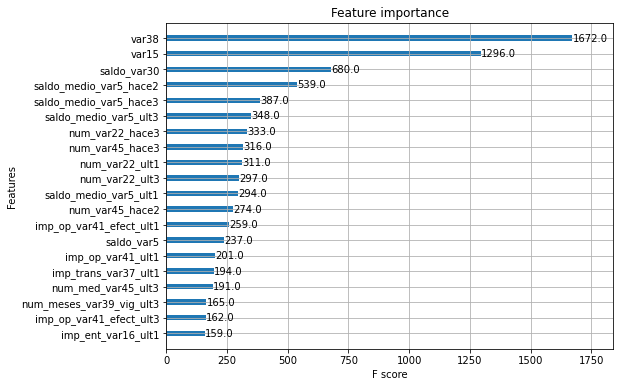

In [141]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(8,6))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.35)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [143]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals=[(X_test,y_test)] # stratified data
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=evals,verbose=True)

lgbm_roc_auc = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('LGBM_ROC AUC: {0:.4f}'.format(lgbm_roc_auc))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss: 0.139909
[16]	valid_0's auc: 0.821862	valid_0's binary_loglos

[130]	valid_0's auc: 0.812543	valid_0's binary_logloss: 0.141488
[131]	valid_0's auc: 0.812427	valid_0's binary_logloss: 0.141521
[132]	valid_0's auc: 0.812236	valid_0's binary_logloss: 0.141618
[133]	valid_0's auc: 0.812159	valid_0's binary_logloss: 0.141665
[134]	valid_0's auc: 0.811863	valid_0's binary_logloss: 0.141757
[135]	valid_0's auc: 0.811658	valid_0's binary_logloss: 0.141818
[136]	valid_0's auc: 0.811612	valid_0's binary_logloss: 0.141817
[137]	valid_0's auc: 0.811529	valid_0's binary_logloss: 0.14184
[138]	valid_0's auc: 0.811442	valid_0's binary_logloss: 0.141896
[139]	valid_0's auc: 0.811524	valid_0's binary_logloss: 0.141931
[140]	valid_0's auc: 0.811309	valid_0's binary_logloss: 0.142004
[141]	valid_0's auc: 0.811321	valid_0's binary_logloss: 0.142035
[142]	valid_0's auc: 0.811275	valid_0's binary_logloss: 0.142077
[143]	valid_0's auc: 0.811453	valid_0's binary_logloss: 0.142082
LGBM_ROC AUC: 0.8239


In [144]:
?LGBMClassifier

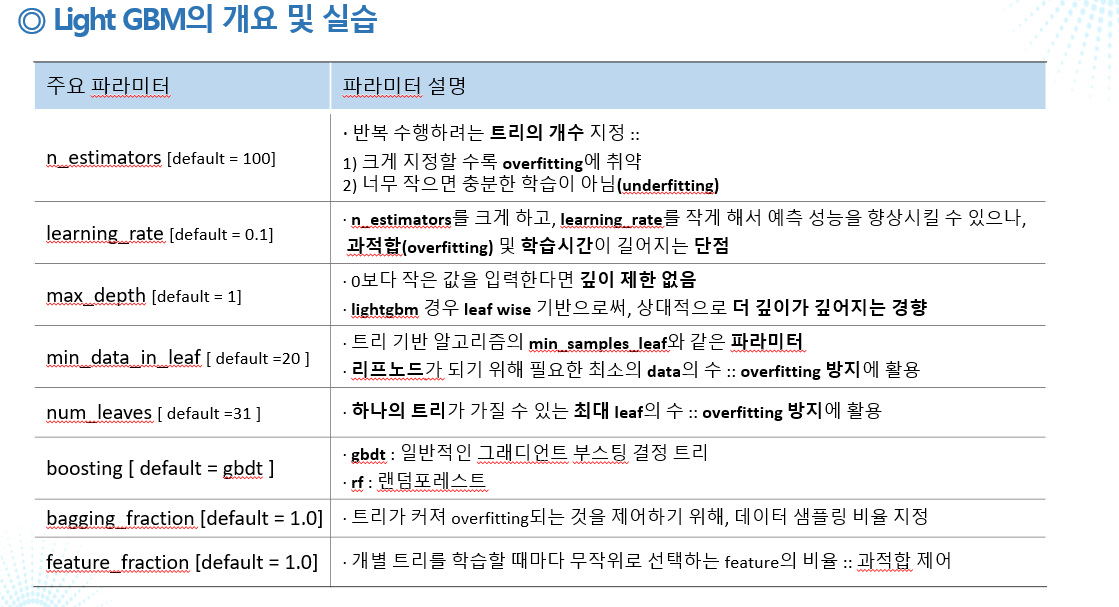 

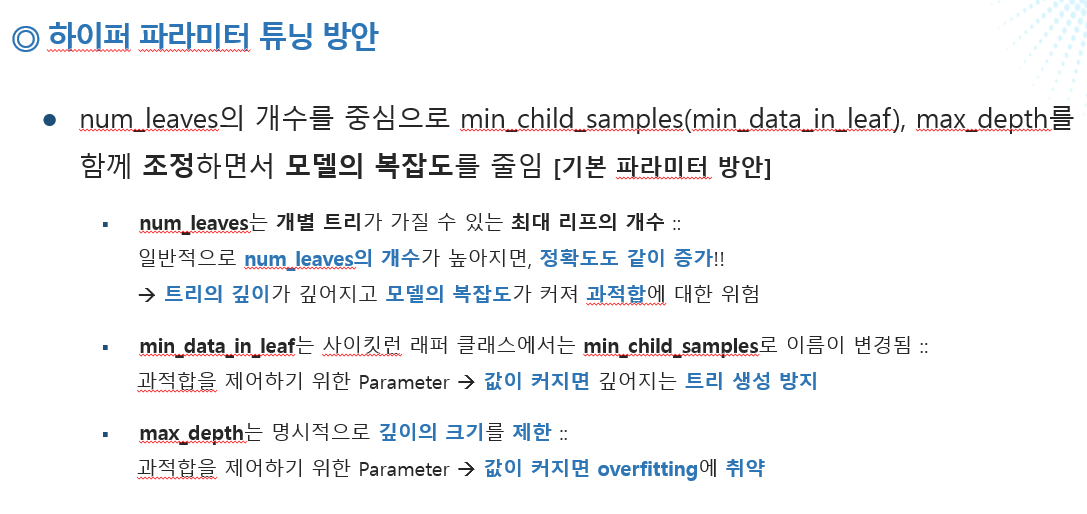 

In [145]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위한 n_estimators를 200으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
         'max_depth':[128,160],
         'min_child_samples':[60,100]}

# 하이퍼 파라미터 테스트 수행속도를 고려하여 cv는 지정하지 않는다.
lgbm_grid = GridSearchCV(LGBM_clf, param_grid = params)
lgbm_grid.fit(X_train,y_train, early_stopping_rounds=100,
        eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)])

print('Gridsearch_CV의 최적 파라미터:', lgbm_grid.best_params_)

lgbm_roc_score = roc_auc_score(y_test, lgbm_grid.predict_proba(X_test)[:,1])
print('튜닝된 ROC_AUC:{0:.4f}'.format(lgbm_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

[81]	valid_0's auc: 0.90664	valid_0's binary_logloss: 0.113086	valid_1's auc: 0.816982	valid_1's binary_logloss: 0.14021
[82]	valid_0's auc: 0.906905	valid_0's binary_logloss: 0.112913	valid_1's auc: 0.817206	valid_1's binary_logloss: 0.140182
[83]	valid_0's auc: 0.90709	valid_0's binary_logloss: 0.112769	valid_1's auc: 0.816806	valid_1's binary_logloss: 0.14027
[84]	valid_0's auc: 0.907322	valid_0's binary_logloss: 0.11262	valid_1's auc: 0.816485	valid_1's binary_logloss: 0.140362
[85]	valid_0's auc: 0.907446	valid_0's binary_logloss: 0.112531	valid_1's auc: 0.816549	valid_1's binary_logloss: 0.140376
[86]	valid_0's auc: 0.907776	valid_0's binary_logloss: 0.112413	valid_1's auc: 0.816688	valid_1's binary_logloss: 0.140387
[87]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.112301	valid_1's auc: 0.816667	valid_1's binary_logloss: 0.140424
[88]	valid_0's auc: 0.908057	valid_0's binary_logloss: 0.112197	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.140433
[89]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

[81]	valid_0's auc: 0.906648	valid_0's binary_logloss: 0.11315	valid_1's auc: 0.814257	valid_1's binary_logloss: 0.140508
[82]	valid_0's auc: 0.906816	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.814023	valid_1's binary_logloss: 0.140556
[83]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.112919	valid_1's auc: 0.814046	valid_1's binary_logloss: 0.140583
[84]	valid_0's auc: 0.907603	valid_0's binary_logloss: 0.112739	valid_1's auc: 0.814068	valid_1's binary_logloss: 0.140603
[85]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.112625	valid_1's auc: 0.813755	valid_1's binary_logloss: 0.140698
[86]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.112472	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.140763
[87]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.112354	valid_1's auc: 0.81342	valid_1's binary_logloss: 0.140795
[88]	valid_0's auc: 0.908503	valid_0's binary_logloss: 0.11219	valid_1's auc: 0.813049	valid_1's binary_logloss: 0.14091
[89]	valid_0's auc: 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

[77]	valid_0's auc: 0.903483	valid_0's binary_logloss: 0.11432	valid_1's auc: 0.823502	valid_1's binary_logloss: 0.138219
[78]	valid_0's auc: 0.903643	valid_0's binary_logloss: 0.1142	valid_1's auc: 0.82323	valid_1's binary_logloss: 0.138298
[79]	valid_0's auc: 0.903907	valid_0's binary_logloss: 0.114056	valid_1's auc: 0.822999	valid_1's binary_logloss: 0.138367
[80]	valid_0's auc: 0.904363	valid_0's binary_logloss: 0.113851	valid_1's auc: 0.822608	valid_1's binary_logloss: 0.138441
[81]	valid_0's auc: 0.905122	valid_0's binary_logloss: 0.113586	valid_1's auc: 0.822544	valid_1's binary_logloss: 0.138479
[82]	valid_0's auc: 0.905255	valid_0's binary_logloss: 0.113467	valid_1's auc: 0.822336	valid_1's binary_logloss: 0.138545
[83]	valid_0's auc: 0.905814	valid_0's binary_logloss: 0.113285	valid_1's auc: 0.822213	valid_1's binary_logloss: 0.13856
[84]	valid_0's auc: 0.905987	valid_0's binary_logloss: 0.113167	valid_1's auc: 0.821633	valid_1's binary_logloss: 0.138669
[85]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

[81]	valid_0's auc: 0.904265	valid_0's binary_logloss: 0.113492	valid_1's auc: 0.817757	valid_1's binary_logloss: 0.139603
[82]	valid_0's auc: 0.904617	valid_0's binary_logloss: 0.113332	valid_1's auc: 0.817822	valid_1's binary_logloss: 0.139611
[83]	valid_0's auc: 0.904923	valid_0's binary_logloss: 0.113173	valid_1's auc: 0.817735	valid_1's binary_logloss: 0.139653
[84]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.112995	valid_1's auc: 0.817614	valid_1's binary_logloss: 0.139702
[85]	valid_0's auc: 0.905594	valid_0's binary_logloss: 0.11287	valid_1's auc: 0.81778	valid_1's binary_logloss: 0.139706
[86]	valid_0's auc: 0.905714	valid_0's binary_logloss: 0.112782	valid_1's auc: 0.817834	valid_1's binary_logloss: 0.139741
[87]	valid_0's auc: 0.906489	valid_0's binary_logloss: 0.112547	valid_1's auc: 0.817917	valid_1's binary_logloss: 0.139765
[88]	valid_0's auc: 0.906895	valid_0's binary_logloss: 0.112401	valid_1's auc: 0.817941	valid_1's binary_logloss: 0.139784
[89]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

[79]	valid_0's auc: 0.904211	valid_0's binary_logloss: 0.113512	valid_1's auc: 0.810654	valid_1's binary_logloss: 0.141366
[80]	valid_0's auc: 0.904692	valid_0's binary_logloss: 0.113348	valid_1's auc: 0.810342	valid_1's binary_logloss: 0.141446
[81]	valid_0's auc: 0.904903	valid_0's binary_logloss: 0.113231	valid_1's auc: 0.81009	valid_1's binary_logloss: 0.14154
[82]	valid_0's auc: 0.905188	valid_0's binary_logloss: 0.113087	valid_1's auc: 0.809577	valid_1's binary_logloss: 0.141675
[83]	valid_0's auc: 0.905289	valid_0's binary_logloss: 0.112991	valid_1's auc: 0.809423	valid_1's binary_logloss: 0.141726
[84]	valid_0's auc: 0.905723	valid_0's binary_logloss: 0.112797	valid_1's auc: 0.809241	valid_1's binary_logloss: 0.141794
[85]	valid_0's auc: 0.905823	valid_0's binary_logloss: 0.112695	valid_1's auc: 0.808741	valid_1's binary_logloss: 0.141919
[86]	valid_0's auc: 0.905922	valid_0's binary_logloss: 0.11259	valid_1's auc: 0.808501	valid_1's binary_logloss: 0.142006
[87]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

[72]	valid_0's auc: 0.921896	valid_0's binary_logloss: 0.104737	valid_1's auc: 0.816257	valid_1's binary_logloss: 0.140915
[73]	valid_0's auc: 0.922105	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.815821	valid_1's binary_logloss: 0.141071
[74]	valid_0's auc: 0.92223	valid_0's binary_logloss: 0.104368	valid_1's auc: 0.815638	valid_1's binary_logloss: 0.141181
[75]	valid_0's auc: 0.922539	valid_0's binary_logloss: 0.10414	valid_1's auc: 0.815253	valid_1's binary_logloss: 0.141355
[76]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.103994	valid_1's auc: 0.815319	valid_1's binary_logloss: 0.141402
[77]	valid_0's auc: 0.922729	valid_0's binary_logloss: 0.103842	valid_1's auc: 0.814634	valid_1's binary_logloss: 0.141576
[78]	valid_0's auc: 0.923014	valid_0's binary_logloss: 0.103625	valid_1's auc: 0.814483	valid_1's binary_logloss: 0.141635
[79]	valid_0's auc: 0.923806	valid_0's binary_logloss: 0.103314	valid_1's auc: 0.814402	valid_1's binary_logloss: 0.141703
[80]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

[78]	valid_0's auc: 0.927045	valid_0's binary_logloss: 0.102872	valid_1's auc: 0.813103	valid_1's binary_logloss: 0.142358
[79]	valid_0's auc: 0.927372	valid_0's binary_logloss: 0.102663	valid_1's auc: 0.812836	valid_1's binary_logloss: 0.142445
[80]	valid_0's auc: 0.927644	valid_0's binary_logloss: 0.102448	valid_1's auc: 0.812782	valid_1's binary_logloss: 0.142507
[81]	valid_0's auc: 0.927844	valid_0's binary_logloss: 0.102275	valid_1's auc: 0.812383	valid_1's binary_logloss: 0.142626
[82]	valid_0's auc: 0.927989	valid_0's binary_logloss: 0.102123	valid_1's auc: 0.811803	valid_1's binary_logloss: 0.142811
[83]	valid_0's auc: 0.928252	valid_0's binary_logloss: 0.101893	valid_1's auc: 0.811273	valid_1's binary_logloss: 0.142978
[84]	valid_0's auc: 0.928728	valid_0's binary_logloss: 0.101639	valid_1's auc: 0.810911	valid_1's binary_logloss: 0.143081
[85]	valid_0's auc: 0.929061	valid_0's binary_logloss: 0.101412	valid_1's auc: 0.810766	valid_1's binary_logloss: 0.143178
[86]	valid_0's a

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

[73]	valid_0's auc: 0.923517	valid_0's binary_logloss: 0.104331	valid_1's auc: 0.819993	valid_1's binary_logloss: 0.139952
[74]	valid_0's auc: 0.923673	valid_0's binary_logloss: 0.104164	valid_1's auc: 0.819644	valid_1's binary_logloss: 0.140102
[75]	valid_0's auc: 0.923883	valid_0's binary_logloss: 0.104034	valid_1's auc: 0.819381	valid_1's binary_logloss: 0.140223
[76]	valid_0's auc: 0.924164	valid_0's binary_logloss: 0.103826	valid_1's auc: 0.818922	valid_1's binary_logloss: 0.140347
[77]	valid_0's auc: 0.924392	valid_0's binary_logloss: 0.103653	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.140437
[78]	valid_0's auc: 0.924419	valid_0's binary_logloss: 0.103512	valid_1's auc: 0.818444	valid_1's binary_logloss: 0.14052
[79]	valid_0's auc: 0.924504	valid_0's binary_logloss: 0.103393	valid_1's auc: 0.817825	valid_1's binary_logloss: 0.140728
[80]	valid_0's auc: 0.924735	valid_0's binary_logloss: 0.103201	valid_1's auc: 0.817655	valid_1's binary_logloss: 0.140826
[81]	valid_0's au

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

[75]	valid_0's auc: 0.923386	valid_0's binary_logloss: 0.103874	valid_1's auc: 0.811292	valid_1's binary_logloss: 0.14222
[76]	valid_0's auc: 0.923448	valid_0's binary_logloss: 0.10374	valid_1's auc: 0.81109	valid_1's binary_logloss: 0.142336
[77]	valid_0's auc: 0.923485	valid_0's binary_logloss: 0.10359	valid_1's auc: 0.810612	valid_1's binary_logloss: 0.142485
[78]	valid_0's auc: 0.924034	valid_0's binary_logloss: 0.103341	valid_1's auc: 0.81053	valid_1's binary_logloss: 0.14258
[79]	valid_0's auc: 0.924299	valid_0's binary_logloss: 0.103166	valid_1's auc: 0.810477	valid_1's binary_logloss: 0.142664
[80]	valid_0's auc: 0.924534	valid_0's binary_logloss: 0.103008	valid_1's auc: 0.810244	valid_1's binary_logloss: 0.142733
[81]	valid_0's auc: 0.924889	valid_0's binary_logloss: 0.102784	valid_1's auc: 0.810182	valid_1's binary_logloss: 0.142804
[82]	valid_0's auc: 0.924948	valid_0's binary_logloss: 0.102635	valid_1's auc: 0.810056	valid_1's binary_logloss: 0.142887
[83]	valid_0's auc: 0.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

[77]	valid_0's auc: 0.921698	valid_0's binary_logloss: 0.104042	valid_1's auc: 0.812648	valid_1's binary_logloss: 0.141925
[78]	valid_0's auc: 0.921942	valid_0's binary_logloss: 0.10383	valid_1's auc: 0.812247	valid_1's binary_logloss: 0.142074
[79]	valid_0's auc: 0.922063	valid_0's binary_logloss: 0.103658	valid_1's auc: 0.812315	valid_1's binary_logloss: 0.142105
[80]	valid_0's auc: 0.922663	valid_0's binary_logloss: 0.103367	valid_1's auc: 0.812506	valid_1's binary_logloss: 0.142094
[81]	valid_0's auc: 0.922885	valid_0's binary_logloss: 0.10318	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.142174
[82]	valid_0's auc: 0.923366	valid_0's binary_logloss: 0.102966	valid_1's auc: 0.812379	valid_1's binary_logloss: 0.142232
[83]	valid_0's auc: 0.924009	valid_0's binary_logloss: 0.102722	valid_1's auc: 0.812378	valid_1's binary_logloss: 0.142286
[84]	valid_0's auc: 0.924658	valid_0's binary_logloss: 0.102436	valid_1's auc: 0.811873	valid_1's binary_logloss: 0.142456
[85]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[74]	valid_0's auc: 0.900782	valid_0's binary_logloss: 0.115632	valid_1's auc: 0.816451	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 0.900949	valid_0's binary_logloss: 0.115512	valid_1's auc: 0.816272	valid_1's binary_logloss: 0.140042
[76]	valid_0's auc: 0.901509	valid_0's binary_logloss: 0.115349	valid_1's auc: 0.816169	valid_1's binary_logloss: 0.14006
[77]	valid_0's auc: 0.901742	valid_0's binary_logloss: 0.11523	valid_1's auc: 0.815963	valid_1's binary_logloss: 0.140121
[78]	valid_0's auc: 0.902199	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.81554	valid_1's binary_logloss: 0.140224
[79]	valid_0's auc: 0.902447	valid_0's binary_logloss: 0.114888	valid_1's auc: 0.815246	valid_1's binary_logloss: 0.140287
[80]	valid_0's auc: 0.90283	valid_0's binary_logloss: 0.114767	valid_1's auc: 0.815232	valid_1's binary_logloss: 0.140288
[81]	valid_0's auc: 0.90303	valid_0's binary_logloss: 0.11466	valid_1's auc: 0.815196	valid_1's binary_logloss: 0.140321
[82]	valid_0's auc: 0.9

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

[81]	valid_0's auc: 0.90205	valid_0's binary_logloss: 0.114824	valid_1's auc: 0.816763	valid_1's binary_logloss: 0.13981
[82]	valid_0's auc: 0.902867	valid_0's binary_logloss: 0.114626	valid_1's auc: 0.816977	valid_1's binary_logloss: 0.139785
[83]	valid_0's auc: 0.903291	valid_0's binary_logloss: 0.114453	valid_1's auc: 0.817064	valid_1's binary_logloss: 0.139787
[84]	valid_0's auc: 0.903435	valid_0's binary_logloss: 0.114322	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.139849
[85]	valid_0's auc: 0.903738	valid_0's binary_logloss: 0.114178	valid_1's auc: 0.816298	valid_1's binary_logloss: 0.139969
[86]	valid_0's auc: 0.904034	valid_0's binary_logloss: 0.114029	valid_1's auc: 0.816299	valid_1's binary_logloss: 0.139993
[87]	valid_0's auc: 0.904313	valid_0's binary_logloss: 0.113879	valid_1's auc: 0.815781	valid_1's binary_logloss: 0.140107
[88]	valid_0's auc: 0.905218	valid_0's binary_logloss: 0.11365	valid_1's auc: 0.815612	valid_1's binary_logloss: 0.140184
[89]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

[80]	valid_0's auc: 0.901131	valid_0's binary_logloss: 0.114838	valid_1's auc: 0.820529	valid_1's binary_logloss: 0.139207
[81]	valid_0's auc: 0.901355	valid_0's binary_logloss: 0.114707	valid_1's auc: 0.820401	valid_1's binary_logloss: 0.139222
[82]	valid_0's auc: 0.901546	valid_0's binary_logloss: 0.114587	valid_1's auc: 0.820341	valid_1's binary_logloss: 0.139215
[83]	valid_0's auc: 0.901715	valid_0's binary_logloss: 0.114487	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.139239
[84]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.114404	valid_1's auc: 0.819839	valid_1's binary_logloss: 0.13936
[85]	valid_0's auc: 0.901978	valid_0's binary_logloss: 0.114306	valid_1's auc: 0.819828	valid_1's binary_logloss: 0.139414
[86]	valid_0's auc: 0.90216	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.819562	valid_1's binary_logloss: 0.139488
[87]	valid_0's auc: 0.902464	valid_0's binary_logloss: 0.114074	valid_1's auc: 0.819623	valid_1's binary_logloss: 0.139522
[88]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

[69]	valid_0's auc: 0.898425	valid_0's binary_logloss: 0.116621	valid_1's auc: 0.818473	valid_1's binary_logloss: 0.13915
[70]	valid_0's auc: 0.898885	valid_0's binary_logloss: 0.116458	valid_1's auc: 0.818333	valid_1's binary_logloss: 0.139181
[71]	valid_0's auc: 0.899118	valid_0's binary_logloss: 0.116331	valid_1's auc: 0.81813	valid_1's binary_logloss: 0.139249
[72]	valid_0's auc: 0.899303	valid_0's binary_logloss: 0.116232	valid_1's auc: 0.818302	valid_1's binary_logloss: 0.139268
[73]	valid_0's auc: 0.899548	valid_0's binary_logloss: 0.116073	valid_1's auc: 0.81808	valid_1's binary_logloss: 0.13933
[74]	valid_0's auc: 0.899821	valid_0's binary_logloss: 0.115927	valid_1's auc: 0.817586	valid_1's binary_logloss: 0.139438
[75]	valid_0's auc: 0.900111	valid_0's binary_logloss: 0.115771	valid_1's auc: 0.817566	valid_1's binary_logloss: 0.139462
[76]	valid_0's auc: 0.900434	valid_0's binary_logloss: 0.115619	valid_1's auc: 0.817338	valid_1's binary_logloss: 0.139495
[77]	valid_0's auc: 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

[68]	valid_0's auc: 0.899963	valid_0's binary_logloss: 0.115986	valid_1's auc: 0.817169	valid_1's binary_logloss: 0.139926
[69]	valid_0's auc: 0.900137	valid_0's binary_logloss: 0.115836	valid_1's auc: 0.816773	valid_1's binary_logloss: 0.14005
[70]	valid_0's auc: 0.900329	valid_0's binary_logloss: 0.115705	valid_1's auc: 0.816508	valid_1's binary_logloss: 0.140125
[71]	valid_0's auc: 0.900857	valid_0's binary_logloss: 0.115567	valid_1's auc: 0.816816	valid_1's binary_logloss: 0.140101
[72]	valid_0's auc: 0.901287	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.816579	valid_1's binary_logloss: 0.140125
[73]	valid_0's auc: 0.901543	valid_0's binary_logloss: 0.11523	valid_1's auc: 0.816676	valid_1's binary_logloss: 0.140126
[74]	valid_0's auc: 0.901936	valid_0's binary_logloss: 0.11506	valid_1's auc: 0.816495	valid_1's binary_logloss: 0.140197
[75]	valid_0's auc: 0.9023	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.816589	valid_1's binary_logloss: 0.140187
[76]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

[74]	valid_0's auc: 0.919665	valid_0's binary_logloss: 0.105773	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.142272
[75]	valid_0's auc: 0.919825	valid_0's binary_logloss: 0.105628	valid_1's auc: 0.810576	valid_1's binary_logloss: 0.142418
[76]	valid_0's auc: 0.920182	valid_0's binary_logloss: 0.105419	valid_1's auc: 0.810274	valid_1's binary_logloss: 0.142543
[77]	valid_0's auc: 0.920458	valid_0's binary_logloss: 0.105268	valid_1's auc: 0.809992	valid_1's binary_logloss: 0.142633
[78]	valid_0's auc: 0.92096	valid_0's binary_logloss: 0.105035	valid_1's auc: 0.809599	valid_1's binary_logloss: 0.142758
[79]	valid_0's auc: 0.921225	valid_0's binary_logloss: 0.10485	valid_1's auc: 0.809164	valid_1's binary_logloss: 0.142892
[80]	valid_0's auc: 0.921565	valid_0's binary_logloss: 0.104612	valid_1's auc: 0.809127	valid_1's binary_logloss: 0.142978
[81]	valid_0's auc: 0.921886	valid_0's binary_logloss: 0.104372	valid_1's auc: 0.809054	valid_1's binary_logloss: 0.142996
[82]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

[73]	valid_0's auc: 0.922876	valid_0's binary_logloss: 0.105336	valid_1's auc: 0.81639	valid_1's binary_logloss: 0.141049
[74]	valid_0's auc: 0.923302	valid_0's binary_logloss: 0.105068	valid_1's auc: 0.816056	valid_1's binary_logloss: 0.141144
[75]	valid_0's auc: 0.923537	valid_0's binary_logloss: 0.104885	valid_1's auc: 0.815977	valid_1's binary_logloss: 0.141187
[76]	valid_0's auc: 0.924134	valid_0's binary_logloss: 0.104592	valid_1's auc: 0.815716	valid_1's binary_logloss: 0.141318
[77]	valid_0's auc: 0.924659	valid_0's binary_logloss: 0.104335	valid_1's auc: 0.815342	valid_1's binary_logloss: 0.141436
[78]	valid_0's auc: 0.924983	valid_0's binary_logloss: 0.104085	valid_1's auc: 0.81489	valid_1's binary_logloss: 0.14158
[79]	valid_0's auc: 0.925256	valid_0's binary_logloss: 0.103896	valid_1's auc: 0.814523	valid_1's binary_logloss: 0.141669
[80]	valid_0's auc: 0.925592	valid_0's binary_logloss: 0.103688	valid_1's auc: 0.814278	valid_1's binary_logloss: 0.141752
[81]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

[75]	valid_0's auc: 0.921605	valid_0's binary_logloss: 0.105182	valid_1's auc: 0.81749	valid_1's binary_logloss: 0.140568
[76]	valid_0's auc: 0.922039	valid_0's binary_logloss: 0.104949	valid_1's auc: 0.817034	valid_1's binary_logloss: 0.140714
[77]	valid_0's auc: 0.922346	valid_0's binary_logloss: 0.104754	valid_1's auc: 0.816823	valid_1's binary_logloss: 0.140814
[78]	valid_0's auc: 0.922699	valid_0's binary_logloss: 0.104516	valid_1's auc: 0.816888	valid_1's binary_logloss: 0.140832
[79]	valid_0's auc: 0.922809	valid_0's binary_logloss: 0.104379	valid_1's auc: 0.816395	valid_1's binary_logloss: 0.141012
[80]	valid_0's auc: 0.922955	valid_0's binary_logloss: 0.104201	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.14113
[81]	valid_0's auc: 0.92316	valid_0's binary_logloss: 0.10409	valid_1's auc: 0.815968	valid_1's binary_logloss: 0.141232
[82]	valid_0's auc: 0.923464	valid_0's binary_logloss: 0.10393	valid_1's auc: 0.816052	valid_1's binary_logloss: 0.141281
[83]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

[77]	valid_0's auc: 0.920253	valid_0's binary_logloss: 0.105311	valid_1's auc: 0.811632	valid_1's binary_logloss: 0.14188
[78]	valid_0's auc: 0.920484	valid_0's binary_logloss: 0.105163	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.142012
[79]	valid_0's auc: 0.920584	valid_0's binary_logloss: 0.105036	valid_1's auc: 0.81054	valid_1's binary_logloss: 0.142169
[80]	valid_0's auc: 0.921158	valid_0's binary_logloss: 0.104797	valid_1's auc: 0.810372	valid_1's binary_logloss: 0.142227
[81]	valid_0's auc: 0.921507	valid_0's binary_logloss: 0.104613	valid_1's auc: 0.810159	valid_1's binary_logloss: 0.142301
[82]	valid_0's auc: 0.921829	valid_0's binary_logloss: 0.104394	valid_1's auc: 0.810164	valid_1's binary_logloss: 0.14235
[83]	valid_0's auc: 0.921949	valid_0's binary_logloss: 0.104252	valid_1's auc: 0.80991	valid_1's binary_logloss: 0.142434
[84]	valid_0's auc: 0.922151	valid_0's binary_logloss: 0.104092	valid_1's auc: 0.810027	valid_1's binary_logloss: 0.142467
[85]	valid_0's auc: 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

[68]	valid_0's auc: 0.918207	valid_0's binary_logloss: 0.106838	valid_1's auc: 0.809713	valid_1's binary_logloss: 0.142394
[69]	valid_0's auc: 0.918329	valid_0's binary_logloss: 0.106676	valid_1's auc: 0.809169	valid_1's binary_logloss: 0.142567
[70]	valid_0's auc: 0.918797	valid_0's binary_logloss: 0.106492	valid_1's auc: 0.809004	valid_1's binary_logloss: 0.14269
[71]	valid_0's auc: 0.919362	valid_0's binary_logloss: 0.10622	valid_1's auc: 0.809032	valid_1's binary_logloss: 0.142717
[72]	valid_0's auc: 0.920139	valid_0's binary_logloss: 0.105997	valid_1's auc: 0.809108	valid_1's binary_logloss: 0.142771
[73]	valid_0's auc: 0.920522	valid_0's binary_logloss: 0.105799	valid_1's auc: 0.809226	valid_1's binary_logloss: 0.142819
[74]	valid_0's auc: 0.920591	valid_0's binary_logloss: 0.105653	valid_1's auc: 0.809013	valid_1's binary_logloss: 0.142934
[75]	valid_0's auc: 0.921074	valid_0's binary_logloss: 0.105416	valid_1's auc: 0.808783	valid_1's binary_logloss: 0.143047
[76]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

[81]	valid_0's auc: 0.90664	valid_0's binary_logloss: 0.113086	valid_1's auc: 0.816982	valid_1's binary_logloss: 0.14021
[82]	valid_0's auc: 0.906905	valid_0's binary_logloss: 0.112913	valid_1's auc: 0.817206	valid_1's binary_logloss: 0.140182
[83]	valid_0's auc: 0.90709	valid_0's binary_logloss: 0.112769	valid_1's auc: 0.816806	valid_1's binary_logloss: 0.14027
[84]	valid_0's auc: 0.907322	valid_0's binary_logloss: 0.11262	valid_1's auc: 0.816485	valid_1's binary_logloss: 0.140362
[85]	valid_0's auc: 0.907446	valid_0's binary_logloss: 0.112531	valid_1's auc: 0.816549	valid_1's binary_logloss: 0.140376
[86]	valid_0's auc: 0.907776	valid_0's binary_logloss: 0.112413	valid_1's auc: 0.816688	valid_1's binary_logloss: 0.140387
[87]	valid_0's auc: 0.907962	valid_0's binary_logloss: 0.112301	valid_1's auc: 0.816667	valid_1's binary_logloss: 0.140424
[88]	valid_0's auc: 0.908057	valid_0's binary_logloss: 0.112197	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.140433
[89]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

[82]	valid_0's auc: 0.906816	valid_0's binary_logloss: 0.113042	valid_1's auc: 0.814023	valid_1's binary_logloss: 0.140556
[83]	valid_0's auc: 0.907215	valid_0's binary_logloss: 0.112919	valid_1's auc: 0.814046	valid_1's binary_logloss: 0.140583
[84]	valid_0's auc: 0.907603	valid_0's binary_logloss: 0.112739	valid_1's auc: 0.814068	valid_1's binary_logloss: 0.140603
[85]	valid_0's auc: 0.907742	valid_0's binary_logloss: 0.112625	valid_1's auc: 0.813755	valid_1's binary_logloss: 0.140698
[86]	valid_0's auc: 0.908071	valid_0's binary_logloss: 0.112472	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.140763
[87]	valid_0's auc: 0.908229	valid_0's binary_logloss: 0.112354	valid_1's auc: 0.81342	valid_1's binary_logloss: 0.140795
[88]	valid_0's auc: 0.908503	valid_0's binary_logloss: 0.11219	valid_1's auc: 0.813049	valid_1's binary_logloss: 0.14091
[89]	valid_0's auc: 0.90887	valid_0's binary_logloss: 0.112025	valid_1's auc: 0.812888	valid_1's binary_logloss: 0.140987
[90]	valid_0's auc: 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845848	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.81728	valid_1's binary_logloss: 0.148596
[5]	valid_0's auc: 0.849247	valid_0's binary_logloss: 0.142212	valid_1's auc: 0.819951	valid_1's binary_logloss: 0.146579
[6]	valid_0's auc: 0.850669	valid_0's binary_logloss: 0.140116	valid_1's auc: 0.818982	valid_1's binary_logloss: 0.145137
[7]	valid_0's auc: 0.853091	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.821526	valid_1's binary_logloss: 0.143781
[8]	valid_0's auc: 0.855444	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.822315	valid_1's binary_logloss: 0.142784
[9]	valid_0's auc: 0.8575

[83]	valid_0's auc: 0.905814	valid_0's binary_logloss: 0.113285	valid_1's auc: 0.822213	valid_1's binary_logloss: 0.13856
[84]	valid_0's auc: 0.905987	valid_0's binary_logloss: 0.113167	valid_1's auc: 0.821633	valid_1's binary_logloss: 0.138669
[85]	valid_0's auc: 0.906275	valid_0's binary_logloss: 0.113019	valid_1's auc: 0.821456	valid_1's binary_logloss: 0.138747
[86]	valid_0's auc: 0.906662	valid_0's binary_logloss: 0.112859	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.138818
[87]	valid_0's auc: 0.907012	valid_0's binary_logloss: 0.112731	valid_1's auc: 0.821074	valid_1's binary_logloss: 0.138852
[88]	valid_0's auc: 0.907151	valid_0's binary_logloss: 0.112626	valid_1's auc: 0.821133	valid_1's binary_logloss: 0.138844
[89]	valid_0's auc: 0.907452	valid_0's binary_logloss: 0.112465	valid_1's auc: 0.821021	valid_1's binary_logloss: 0.138874
[90]	valid_0's auc: 0.907996	valid_0's binary_logloss: 0.112246	valid_1's auc: 0.821057	valid_1's binary_logloss: 0.138885
[91]	valid_0's au

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837613	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803431	valid_1's binary_logloss: 0.151786
[4]	valid_0's auc: 0.841604	valid_0's binary_logloss: 0.144682	valid_1's auc: 0.807225	valid_1's binary_logloss: 0.149285
[5]	valid_0's auc: 0.846168	valid_0's binary_logloss: 0.142127	valid_1's auc: 0.813036	valid_1's binary_logloss: 0.147374
[6]	valid_0's auc: 0.848077	valid_0's binary_logloss: 0.1401	valid_1's auc: 0.81443	valid_1's binary_logloss: 0.145915
[7]	valid_0's auc: 0.850846	valid_0's binary_logloss: 0.138308	valid_1's auc: 0.815516	valid_1's binary_logloss: 0.144635
[8]	valid_0's auc: 0.853214	valid_0's binary_logloss: 0.136801	valid_1's auc: 0.817589	valid_1's binary_logloss: 0.143561
[9]	valid_0's auc: 0.854557	val

[82]	valid_0's auc: 0.904617	valid_0's binary_logloss: 0.113332	valid_1's auc: 0.817822	valid_1's binary_logloss: 0.139611
[83]	valid_0's auc: 0.904923	valid_0's binary_logloss: 0.113173	valid_1's auc: 0.817735	valid_1's binary_logloss: 0.139653
[84]	valid_0's auc: 0.905193	valid_0's binary_logloss: 0.112995	valid_1's auc: 0.817614	valid_1's binary_logloss: 0.139702
[85]	valid_0's auc: 0.905594	valid_0's binary_logloss: 0.11287	valid_1's auc: 0.81778	valid_1's binary_logloss: 0.139706
[86]	valid_0's auc: 0.905714	valid_0's binary_logloss: 0.112782	valid_1's auc: 0.817834	valid_1's binary_logloss: 0.139741
[87]	valid_0's auc: 0.906489	valid_0's binary_logloss: 0.112547	valid_1's auc: 0.817917	valid_1's binary_logloss: 0.139765
[88]	valid_0's auc: 0.906895	valid_0's binary_logloss: 0.112401	valid_1's auc: 0.817941	valid_1's binary_logloss: 0.139784
[89]	valid_0's auc: 0.907253	valid_0's binary_logloss: 0.112252	valid_1's auc: 0.817895	valid_1's binary_logloss: 0.139826
[90]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

[83]	valid_0's auc: 0.905289	valid_0's binary_logloss: 0.112991	valid_1's auc: 0.809423	valid_1's binary_logloss: 0.141726
[84]	valid_0's auc: 0.905723	valid_0's binary_logloss: 0.112797	valid_1's auc: 0.809241	valid_1's binary_logloss: 0.141794
[85]	valid_0's auc: 0.905823	valid_0's binary_logloss: 0.112695	valid_1's auc: 0.808741	valid_1's binary_logloss: 0.141919
[86]	valid_0's auc: 0.905922	valid_0's binary_logloss: 0.11259	valid_1's auc: 0.808501	valid_1's binary_logloss: 0.142006
[87]	valid_0's auc: 0.906026	valid_0's binary_logloss: 0.112502	valid_1's auc: 0.808547	valid_1's binary_logloss: 0.142017
[88]	valid_0's auc: 0.906407	valid_0's binary_logloss: 0.112322	valid_1's auc: 0.80835	valid_1's binary_logloss: 0.14209
[89]	valid_0's auc: 0.90657	valid_0's binary_logloss: 0.11219	valid_1's auc: 0.807935	valid_1's binary_logloss: 0.142183
[90]	valid_0's auc: 0.906816	valid_0's binary_logloss: 0.112056	valid_1's auc: 0.807738	valid_1's binary_logloss: 0.142243
[91]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

[70]	valid_0's auc: 0.921635	valid_0's binary_logloss: 0.105058	valid_1's auc: 0.817096	valid_1's binary_logloss: 0.140653
[71]	valid_0's auc: 0.921791	valid_0's binary_logloss: 0.104908	valid_1's auc: 0.816919	valid_1's binary_logloss: 0.140743
[72]	valid_0's auc: 0.921896	valid_0's binary_logloss: 0.104737	valid_1's auc: 0.816257	valid_1's binary_logloss: 0.140915
[73]	valid_0's auc: 0.922105	valid_0's binary_logloss: 0.104548	valid_1's auc: 0.815821	valid_1's binary_logloss: 0.141071
[74]	valid_0's auc: 0.92223	valid_0's binary_logloss: 0.104368	valid_1's auc: 0.815638	valid_1's binary_logloss: 0.141181
[75]	valid_0's auc: 0.922539	valid_0's binary_logloss: 0.10414	valid_1's auc: 0.815253	valid_1's binary_logloss: 0.141355
[76]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.103994	valid_1's auc: 0.815319	valid_1's binary_logloss: 0.141402
[77]	valid_0's auc: 0.922729	valid_0's binary_logloss: 0.103842	valid_1's auc: 0.814634	valid_1's binary_logloss: 0.141576
[78]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866743	valid_0's binary_logloss: 0.135504	valid_1's auc: 0.820643	valid_1's binary_logloss: 0.143992
[8]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.133816	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.142993
[9]	valid_0's auc: 0.871061	v

[75]	valid_0's auc: 0.926036	valid_0's binary_logloss: 0.103529	valid_1's auc: 0.813419	valid_1's binary_logloss: 0.142197
[76]	valid_0's auc: 0.92657	valid_0's binary_logloss: 0.103288	valid_1's auc: 0.813564	valid_1's binary_logloss: 0.142172
[77]	valid_0's auc: 0.926689	valid_0's binary_logloss: 0.103119	valid_1's auc: 0.812954	valid_1's binary_logloss: 0.14236
[78]	valid_0's auc: 0.927045	valid_0's binary_logloss: 0.102872	valid_1's auc: 0.813103	valid_1's binary_logloss: 0.142358
[79]	valid_0's auc: 0.927372	valid_0's binary_logloss: 0.102663	valid_1's auc: 0.812836	valid_1's binary_logloss: 0.142445
[80]	valid_0's auc: 0.927644	valid_0's binary_logloss: 0.102448	valid_1's auc: 0.812782	valid_1's binary_logloss: 0.142507
[81]	valid_0's auc: 0.927844	valid_0's binary_logloss: 0.102275	valid_1's auc: 0.812383	valid_1's binary_logloss: 0.142626
[82]	valid_0's auc: 0.927989	valid_0's binary_logloss: 0.102123	valid_1's auc: 0.811803	valid_1's binary_logloss: 0.142811
[83]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.85721	valid_0's binary_logloss: 0.142803	valid_1's auc: 0.818058	valid_1's binary_logloss: 0.147969
[5]	valid_0's auc: 0.862272	valid_0's binary_logloss: 0.139966	valid_1's auc: 0.81921	valid_1's binary_logloss: 0.14612
[6]	valid_0's auc: 0.8641	valid_0's binary_logloss: 0.137635	valid_1's auc: 0.818858	valid_1's binary_logloss: 0.144526
[7]	valid_0's auc: 0.867403	valid_0's binary_logloss: 0.135643	valid_1's auc: 0.821163	valid_1's binary_logloss: 0.143227
[8]	valid_0's auc: 0.869312	valid_0's binary_logloss: 0.133962	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.142144
[9]	valid_0's auc: 0.871504	v

[75]	valid_0's auc: 0.923883	valid_0's binary_logloss: 0.104034	valid_1's auc: 0.819381	valid_1's binary_logloss: 0.140223
[76]	valid_0's auc: 0.924164	valid_0's binary_logloss: 0.103826	valid_1's auc: 0.818922	valid_1's binary_logloss: 0.140347
[77]	valid_0's auc: 0.924392	valid_0's binary_logloss: 0.103653	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.140437
[78]	valid_0's auc: 0.924419	valid_0's binary_logloss: 0.103512	valid_1's auc: 0.818444	valid_1's binary_logloss: 0.14052
[79]	valid_0's auc: 0.924504	valid_0's binary_logloss: 0.103393	valid_1's auc: 0.817825	valid_1's binary_logloss: 0.140728
[80]	valid_0's auc: 0.924735	valid_0's binary_logloss: 0.103201	valid_1's auc: 0.817655	valid_1's binary_logloss: 0.140826
[81]	valid_0's auc: 0.925098	valid_0's binary_logloss: 0.103056	valid_1's auc: 0.817435	valid_1's binary_logloss: 0.140927
[82]	valid_0's auc: 0.925268	valid_0's binary_logloss: 0.102867	valid_1's auc: 0.8174	valid_1's binary_logloss: 0.141019
[83]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854401	valid_0's binary_logloss: 0.142822	valid_1's auc: 0.811795	valid_1's binary_logloss: 0.148927
[5]	valid_0's auc: 0.860493	valid_0's binary_logloss: 0.140053	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.147006
[6]	valid_0's auc: 0.862655	valid_0's binary_logloss: 0.137752	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.145651
[7]	valid_0's auc: 0.866989	valid_0's binary_logloss: 0.135785	valid_1's auc: 0.817794	valid_1's binary_logloss: 0.144323
[8]	valid_0's auc: 0.868831	valid_0's binary_logloss: 0.13407	valid_1's auc: 0.81809	valid_1's binary_logloss: 0.143299
[9]	valid_0's auc: 0.870947

[77]	valid_0's auc: 0.923485	valid_0's binary_logloss: 0.10359	valid_1's auc: 0.810612	valid_1's binary_logloss: 0.142485
[78]	valid_0's auc: 0.924034	valid_0's binary_logloss: 0.103341	valid_1's auc: 0.81053	valid_1's binary_logloss: 0.14258
[79]	valid_0's auc: 0.924299	valid_0's binary_logloss: 0.103166	valid_1's auc: 0.810477	valid_1's binary_logloss: 0.142664
[80]	valid_0's auc: 0.924534	valid_0's binary_logloss: 0.103008	valid_1's auc: 0.810244	valid_1's binary_logloss: 0.142733
[81]	valid_0's auc: 0.924889	valid_0's binary_logloss: 0.102784	valid_1's auc: 0.810182	valid_1's binary_logloss: 0.142804
[82]	valid_0's auc: 0.924948	valid_0's binary_logloss: 0.102635	valid_1's auc: 0.810056	valid_1's binary_logloss: 0.142887
[83]	valid_0's auc: 0.925582	valid_0's binary_logloss: 0.102355	valid_1's auc: 0.810036	valid_1's binary_logloss: 0.142957
[84]	valid_0's auc: 0.925856	valid_0's binary_logloss: 0.102169	valid_1's auc: 0.8101	valid_1's binary_logloss: 0.142997
[85]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

[70]	valid_0's auc: 0.920449	valid_0's binary_logloss: 0.105178	valid_1's auc: 0.813799	valid_1's binary_logloss: 0.141371
[71]	valid_0's auc: 0.920643	valid_0's binary_logloss: 0.105	valid_1's auc: 0.813721	valid_1's binary_logloss: 0.141442
[72]	valid_0's auc: 0.920811	valid_0's binary_logloss: 0.104813	valid_1's auc: 0.813561	valid_1's binary_logloss: 0.141543
[73]	valid_0's auc: 0.920911	valid_0's binary_logloss: 0.104674	valid_1's auc: 0.813448	valid_1's binary_logloss: 0.141608
[74]	valid_0's auc: 0.921393	valid_0's binary_logloss: 0.104497	valid_1's auc: 0.813594	valid_1's binary_logloss: 0.141606
[75]	valid_0's auc: 0.921565	valid_0's binary_logloss: 0.104294	valid_1's auc: 0.813543	valid_1's binary_logloss: 0.141625
[76]	valid_0's auc: 0.921657	valid_0's binary_logloss: 0.10416	valid_1's auc: 0.812875	valid_1's binary_logloss: 0.141822
[77]	valid_0's auc: 0.921698	valid_0's binary_logloss: 0.104042	valid_1's auc: 0.812648	valid_1's binary_logloss: 0.141925
[78]	valid_0's auc: 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[78]	valid_0's auc: 0.902199	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.81554	valid_1's binary_logloss: 0.140224
[79]	valid_0's auc: 0.902447	valid_0's binary_logloss: 0.114888	valid_1's auc: 0.815246	valid_1's binary_logloss: 0.140287
[80]	valid_0's auc: 0.90283	valid_0's binary_logloss: 0.114767	valid_1's auc: 0.815232	valid_1's binary_logloss: 0.140288
[81]	valid_0's auc: 0.90303	valid_0's binary_logloss: 0.11466	valid_1's auc: 0.815196	valid_1's binary_logloss: 0.140321
[82]	valid_0's auc: 0.903244	valid_0's binary_logloss: 0.114508	valid_1's auc: 0.815228	valid_1's binary_logloss: 0.140348
[83]	valid_0's auc: 0.903629	valid_0's binary_logloss: 0.114359	valid_1's auc: 0.814959	valid_1's binary_logloss: 0.140416
[84]	valid_0's auc: 0.903757	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.814776	valid_1's binary_logloss: 0.14046
[85]	valid_0's auc: 0.903992	valid_0's binary_logloss: 0.114117	valid_1's auc: 0.814345	valid_1's binary_logloss: 0.140541
[86]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

[78]	valid_0's auc: 0.900931	valid_0's binary_logloss: 0.115237	valid_1's auc: 0.817104	valid_1's binary_logloss: 0.139664
[79]	valid_0's auc: 0.901103	valid_0's binary_logloss: 0.11512	valid_1's auc: 0.816922	valid_1's binary_logloss: 0.139736
[80]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.115001	valid_1's auc: 0.816855	valid_1's binary_logloss: 0.139759
[81]	valid_0's auc: 0.90205	valid_0's binary_logloss: 0.114824	valid_1's auc: 0.816763	valid_1's binary_logloss: 0.13981
[82]	valid_0's auc: 0.902867	valid_0's binary_logloss: 0.114626	valid_1's auc: 0.816977	valid_1's binary_logloss: 0.139785
[83]	valid_0's auc: 0.903291	valid_0's binary_logloss: 0.114453	valid_1's auc: 0.817064	valid_1's binary_logloss: 0.139787
[84]	valid_0's auc: 0.903435	valid_0's binary_logloss: 0.114322	valid_1's auc: 0.816795	valid_1's binary_logloss: 0.139849
[85]	valid_0's auc: 0.903738	valid_0's binary_logloss: 0.114178	valid_1's auc: 0.816298	valid_1's binary_logloss: 0.139969
[86]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

[80]	valid_0's auc: 0.901131	valid_0's binary_logloss: 0.114838	valid_1's auc: 0.820529	valid_1's binary_logloss: 0.139207
[81]	valid_0's auc: 0.901355	valid_0's binary_logloss: 0.114707	valid_1's auc: 0.820401	valid_1's binary_logloss: 0.139222
[82]	valid_0's auc: 0.901546	valid_0's binary_logloss: 0.114587	valid_1's auc: 0.820341	valid_1's binary_logloss: 0.139215
[83]	valid_0's auc: 0.901715	valid_0's binary_logloss: 0.114487	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.139239
[84]	valid_0's auc: 0.901805	valid_0's binary_logloss: 0.114404	valid_1's auc: 0.819839	valid_1's binary_logloss: 0.13936
[85]	valid_0's auc: 0.901978	valid_0's binary_logloss: 0.114306	valid_1's auc: 0.819828	valid_1's binary_logloss: 0.139414
[86]	valid_0's auc: 0.90216	valid_0's binary_logloss: 0.114193	valid_1's auc: 0.819562	valid_1's binary_logloss: 0.139488
[87]	valid_0's auc: 0.902464	valid_0's binary_logloss: 0.114074	valid_1's auc: 0.819623	valid_1's binary_logloss: 0.139522
[88]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

[80]	valid_0's auc: 0.901943	valid_0's binary_logloss: 0.114963	valid_1's auc: 0.817155	valid_1's binary_logloss: 0.139614
[81]	valid_0's auc: 0.902459	valid_0's binary_logloss: 0.114766	valid_1's auc: 0.817025	valid_1's binary_logloss: 0.139638
[82]	valid_0's auc: 0.902632	valid_0's binary_logloss: 0.114658	valid_1's auc: 0.816891	valid_1's binary_logloss: 0.139695
[83]	valid_0's auc: 0.902951	valid_0's binary_logloss: 0.114524	valid_1's auc: 0.817089	valid_1's binary_logloss: 0.139662
[84]	valid_0's auc: 0.903234	valid_0's binary_logloss: 0.114378	valid_1's auc: 0.816733	valid_1's binary_logloss: 0.139747
[85]	valid_0's auc: 0.90342	valid_0's binary_logloss: 0.114268	valid_1's auc: 0.816395	valid_1's binary_logloss: 0.139825
[86]	valid_0's auc: 0.90368	valid_0's binary_logloss: 0.114116	valid_1's auc: 0.816401	valid_1's binary_logloss: 0.139817
[87]	valid_0's auc: 0.903803	valid_0's binary_logloss: 0.114018	valid_1's auc: 0.816504	valid_1's binary_logloss: 0.139823
[88]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

[77]	valid_0's auc: 0.90295	valid_0's binary_logloss: 0.114598	valid_1's auc: 0.815722	valid_1's binary_logloss: 0.140393
[78]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.114464	valid_1's auc: 0.815704	valid_1's binary_logloss: 0.140397
[79]	valid_0's auc: 0.903494	valid_0's binary_logloss: 0.11433	valid_1's auc: 0.815456	valid_1's binary_logloss: 0.140482
[80]	valid_0's auc: 0.903664	valid_0's binary_logloss: 0.114207	valid_1's auc: 0.81533	valid_1's binary_logloss: 0.140554
[81]	valid_0's auc: 0.903947	valid_0's binary_logloss: 0.114069	valid_1's auc: 0.815316	valid_1's binary_logloss: 0.14055
[82]	valid_0's auc: 0.904343	valid_0's binary_logloss: 0.11391	valid_1's auc: 0.815071	valid_1's binary_logloss: 0.140613
[83]	valid_0's auc: 0.904538	valid_0's binary_logloss: 0.113782	valid_1's auc: 0.814811	valid_1's binary_logloss: 0.14068
[84]	valid_0's auc: 0.904934	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.814444	valid_1's binary_logloss: 0.140758
[85]	valid_0's auc: 0.9

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

[68]	valid_0's auc: 0.917612	valid_0's binary_logloss: 0.107054	valid_1's auc: 0.812588	valid_1's binary_logloss: 0.141672
[69]	valid_0's auc: 0.918062	valid_0's binary_logloss: 0.106802	valid_1's auc: 0.812204	valid_1's binary_logloss: 0.141814
[70]	valid_0's auc: 0.918291	valid_0's binary_logloss: 0.10663	valid_1's auc: 0.81211	valid_1's binary_logloss: 0.14187
[71]	valid_0's auc: 0.918472	valid_0's binary_logloss: 0.106455	valid_1's auc: 0.811822	valid_1's binary_logloss: 0.141978
[72]	valid_0's auc: 0.919107	valid_0's binary_logloss: 0.106198	valid_1's auc: 0.811865	valid_1's binary_logloss: 0.142028
[73]	valid_0's auc: 0.919288	valid_0's binary_logloss: 0.106015	valid_1's auc: 0.811217	valid_1's binary_logloss: 0.142214
[74]	valid_0's auc: 0.919665	valid_0's binary_logloss: 0.105773	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.142272
[75]	valid_0's auc: 0.919825	valid_0's binary_logloss: 0.105628	valid_1's auc: 0.810576	valid_1's binary_logloss: 0.142418
[76]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

[74]	valid_0's auc: 0.923302	valid_0's binary_logloss: 0.105068	valid_1's auc: 0.816056	valid_1's binary_logloss: 0.141144
[75]	valid_0's auc: 0.923537	valid_0's binary_logloss: 0.104885	valid_1's auc: 0.815977	valid_1's binary_logloss: 0.141187
[76]	valid_0's auc: 0.924134	valid_0's binary_logloss: 0.104592	valid_1's auc: 0.815716	valid_1's binary_logloss: 0.141318
[77]	valid_0's auc: 0.924659	valid_0's binary_logloss: 0.104335	valid_1's auc: 0.815342	valid_1's binary_logloss: 0.141436
[78]	valid_0's auc: 0.924983	valid_0's binary_logloss: 0.104085	valid_1's auc: 0.81489	valid_1's binary_logloss: 0.14158
[79]	valid_0's auc: 0.925256	valid_0's binary_logloss: 0.103896	valid_1's auc: 0.814523	valid_1's binary_logloss: 0.141669
[80]	valid_0's auc: 0.925592	valid_0's binary_logloss: 0.103688	valid_1's auc: 0.814278	valid_1's binary_logloss: 0.141752
[81]	valid_0's auc: 0.925907	valid_0's binary_logloss: 0.103509	valid_1's auc: 0.814234	valid_1's binary_logloss: 0.141832
[82]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

[70]	valid_0's auc: 0.920212	valid_0's binary_logloss: 0.106148	valid_1's auc: 0.817831	valid_1's binary_logloss: 0.140253
[71]	valid_0's auc: 0.920485	valid_0's binary_logloss: 0.105935	valid_1's auc: 0.817879	valid_1's binary_logloss: 0.140262
[72]	valid_0's auc: 0.92068	valid_0's binary_logloss: 0.105766	valid_1's auc: 0.817748	valid_1's binary_logloss: 0.140325
[73]	valid_0's auc: 0.921117	valid_0's binary_logloss: 0.105579	valid_1's auc: 0.817859	valid_1's binary_logloss: 0.140397
[74]	valid_0's auc: 0.921425	valid_0's binary_logloss: 0.105378	valid_1's auc: 0.817809	valid_1's binary_logloss: 0.140436
[75]	valid_0's auc: 0.921605	valid_0's binary_logloss: 0.105182	valid_1's auc: 0.81749	valid_1's binary_logloss: 0.140568
[76]	valid_0's auc: 0.922039	valid_0's binary_logloss: 0.104949	valid_1's auc: 0.817034	valid_1's binary_logloss: 0.140714
[77]	valid_0's auc: 0.922346	valid_0's binary_logloss: 0.104754	valid_1's auc: 0.816823	valid_1's binary_logloss: 0.140814
[78]	valid_0's auc

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

[80]	valid_0's auc: 0.921158	valid_0's binary_logloss: 0.104797	valid_1's auc: 0.810372	valid_1's binary_logloss: 0.142227
[81]	valid_0's auc: 0.921507	valid_0's binary_logloss: 0.104613	valid_1's auc: 0.810159	valid_1's binary_logloss: 0.142301
[82]	valid_0's auc: 0.921829	valid_0's binary_logloss: 0.104394	valid_1's auc: 0.810164	valid_1's binary_logloss: 0.14235
[83]	valid_0's auc: 0.921949	valid_0's binary_logloss: 0.104252	valid_1's auc: 0.80991	valid_1's binary_logloss: 0.142434
[84]	valid_0's auc: 0.922151	valid_0's binary_logloss: 0.104092	valid_1's auc: 0.810027	valid_1's binary_logloss: 0.142467
[85]	valid_0's auc: 0.92217	valid_0's binary_logloss: 0.10399	valid_1's auc: 0.809904	valid_1's binary_logloss: 0.14255
[86]	valid_0's auc: 0.922245	valid_0's binary_logloss: 0.103877	valid_1's auc: 0.809821	valid_1's binary_logloss: 0.142654
[87]	valid_0's auc: 0.922319	valid_0's binary_logloss: 0.103754	valid_1's auc: 0.809231	valid_1's binary_logloss: 0.142856
[88]	valid_0's auc: 0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

[81]	valid_0's auc: 0.922916	valid_0's binary_logloss: 0.104273	valid_1's auc: 0.808004	valid_1's binary_logloss: 0.143532
[82]	valid_0's auc: 0.923125	valid_0's binary_logloss: 0.104071	valid_1's auc: 0.807914	valid_1's binary_logloss: 0.143589
[83]	valid_0's auc: 0.923267	valid_0's binary_logloss: 0.10391	valid_1's auc: 0.807455	valid_1's binary_logloss: 0.143759
[84]	valid_0's auc: 0.923431	valid_0's binary_logloss: 0.103745	valid_1's auc: 0.807046	valid_1's binary_logloss: 0.143887
[85]	valid_0's auc: 0.923747	valid_0's binary_logloss: 0.103547	valid_1's auc: 0.806734	valid_1's binary_logloss: 0.144027
[86]	valid_0's auc: 0.924043	valid_0's binary_logloss: 0.103349	valid_1's auc: 0.806419	valid_1's binary_logloss: 0.144164
[87]	valid_0's auc: 0.924364	valid_0's binary_logloss: 0.1032	valid_1's auc: 0.806607	valid_1's binary_logloss: 0.144212
[88]	valid_0's auc: 0.924428	valid_0's binary_logloss: 0.103067	valid_1's auc: 0.806305	valid_1's binary_logloss: 0.144324
[89]	valid_0's auc:

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.828812	training's binary_logloss: 0.157418	valid_1's auc: 0.796283	valid_1's binary_logloss: 0.159424
[2]	training's auc: 0.837744	training's binary_logloss: 0.151879	valid_1's auc: 0.803289	valid_1's binary_logloss: 0.154921
[3]	training's auc: 0.84174	training's binary_logloss: 0.147881	valid_1's auc: 0.807301	valid_1's binary_logloss: 0.1518
[4]	training's auc: 0.846214	training's binary_logloss: 0.144859	valid_1's auc: 0.811102	valid_1's binary_logloss: 0.149384
[5]	training's auc: 0.851186	training's binary_logloss: 0.14225	valid_1's auc: 0.817613	valid_1's binary_logloss: 0.147338
[6]	training's auc: 0.853336	training's binary_logloss: 0.140122	valid_1's auc: 0.819807	valid_1's binary_logloss: 0.145735
[7]	training's auc: 0.854847	training's binary_logloss: 0.138357	valid_1's auc: 0.820399	valid_1's binary_logloss: 0.1445
[8]	training's auc: 0.855799	training's binary_logloss: 0.136862	valid_1's auc: 0.820003	valid_1's binary_logloss: 0.143404
[9]	training's

[81]	training's auc: 0.911718	training's binary_logloss: 0.112552	valid_1's auc: 0.82115	valid_1's binary_logloss: 0.138601
[82]	training's auc: 0.912147	training's binary_logloss: 0.112359	valid_1's auc: 0.820638	valid_1's binary_logloss: 0.138686
[83]	training's auc: 0.912394	training's binary_logloss: 0.112209	valid_1's auc: 0.820792	valid_1's binary_logloss: 0.138726
[84]	training's auc: 0.912706	training's binary_logloss: 0.112072	valid_1's auc: 0.82093	valid_1's binary_logloss: 0.138713
[85]	training's auc: 0.912881	training's binary_logloss: 0.111951	valid_1's auc: 0.821083	valid_1's binary_logloss: 0.138716
[86]	training's auc: 0.913079	training's binary_logloss: 0.111826	valid_1's auc: 0.82088	valid_1's binary_logloss: 0.138753
[87]	training's auc: 0.913553	training's binary_logloss: 0.111602	valid_1's auc: 0.820931	valid_1's binary_logloss: 0.138787
[88]	training's auc: 0.913844	training's binary_logloss: 0.111447	valid_1's auc: 0.820743	valid_1's binary_logloss: 0.138824
[89

In [146]:
#하이퍼 파라미터 튜닝
lgbm_clf = LGBMClassifier(n_estimators=1000,
                         max_depth=128,
                         min_child_samples=100,
                         num_leaves =32)

# 위가 hyper parameter tuning된 녀석

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=100,
        eval_metric='auc', eval_set=evals)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('하이퍼파라미터 튜닝 후의 ROC_AUC:{0:.4f}'.format(lgbm_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0.139486
[16]	valid_0's auc: 0.822894	valid_0's binary_logloss: